In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# **DATA UPLOAD**


In [3]:
data = pd.read_csv("MI.data", sep=',',header = None)
column_names = [
    'ID', 'AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT',
    'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04',
    'np_05', 'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01',
    'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT',
    'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im',
    'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04',
    'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03',
    'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10',
    'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07',
    'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01',
    'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K',
    'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S',
    'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n',
    'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n',
    'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK',
    'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']
new_column_names = {i: col for i, col in enumerate(column_names)}
new_column_names
data.rename(columns=new_column_names, inplace = True)
data.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77,1,2,1,1,2,?,3,0,...,0,0,0,0,0,0,0,0,0,0
1,2,55,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,52,1,0,0,0,2,?,2,0,...,0,0,0,0,0,0,0,0,0,0
3,4,68,0,0,0,0,2,?,2,0,...,0,0,0,0,0,0,1,0,0,0
4,5,60,1,0,0,0,2,?,3,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
columns_drop = [
    'ID', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT',
    'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im',
    'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04',
    'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03',
    'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10',
    'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07',
    'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01',
    'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K',
    'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S',
    'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n',
    'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n',
    'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK',
    'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']

In [5]:
interview_columns_raw = ['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST',
       'IBS_NASL', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01',
       'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05',
       'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02',
       'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04',
       'zab_leg_06', 'KFK_BLOOD']
emergency_diagnoses_raw = ['D_AD_KBRIG', 'S_AD_ORIT','ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08','n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06',
 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12']
emergency_drugs_raw = []
ICU_diagnoses_raw = ['S_AD_ORIT', 'D_AD_ORIT','O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P',
                 'GIPO_K', 'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n']
ICU_drugs_raw= ['fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08',
             'NITR_S', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n',
             'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n']


# **FEATURES AND TARGETS DICTIONARY**

In [6]:
# Table with quick description of every feature/target for a better understanding
"""
-------------------------------------
First word of every category:
Who got the information?
- PD = Patient_Doctor Interview
- ECG = Emergency Cardiology Team
- ICU = Intensive Care Unit

- T = Targets (just last 12 features)

Last word of every category:
How is categorized every feature in general (every case should be analyzed separately)
- Count: once, twice, three times...
- Duration: days, weeks, months, years...
- Category: classes, stages, types...
- YN: Yes or No
- Time: hours, days...
- XLevel: X units (continous)
-------------------------------------
"""
data_desc = data.copy()
# Rename of the column headers for better understanding
column_names_desc = [
    'ID', 'Age', 'Sex', 'PD_MyocardialInfarction_Count','PD_ChestPain_Duration', 'PD_ChestPain_Category',
    'PD_CoronaryHeartDisease_Category', 'PD_HeredityHeartDisease_YN', 'PD_Hyperthesion_Category',
    'PD_SymptomaticHyperthesion_YN', 'PD_Hyperthesion_Duration', 'PD_HeartFailure_Category', 'PD_Arrhythmia1_YN',
    'PD_Arrhythmia2_YN', 'PD_Arrhythmia3_YN','PD_Arrhythmia4_YN', 'PD_Arrhythmia5_YN', 'PD_Arrhythmia6_YN',
    'PD_Arrhythmia7_YN', 'PD_HeartBlock1_YN', 'PD_HeartBlock2_YN', 'PD_HeartBlock3_YN', 'PD_HeartBlock4_YN',
    'PD_HeartBlock5_YN', 'PD_HeartBlock6_YN', 'PD_HeartBlock7_YN', 'PD_Diabetes_YN', 'PD_Obesity_YN',
    'PD_HighThyroidHormone_YN', 'PD_ChronicBronchitis_YN', 'PD_BronchitisObstructive_YN', 'PD_Asthma_YN',
    'PD_ChronicPneumonia_YN', 'PD_PulmonaryTuberculosis_YN', 'ECT_SystolicBloodPressure_mmHgLevel',
    'ECT_DiastolicBloodPressure_mmHgLevel', 'ICU_SystolicBloodPressure_mmHgLevel', 'ICU_DiastolicBloodPressure_mmHgLevel',
    'ICU_PulmonaryEdema_YN', 'ICU_CardiogenicSchock_YN', 'ICU_Arrhythmia1_YN', 'ICU_Arrhythmia2_YN',
    'ICU_Arrhythmia3_YN', 'ICU_Arrhythmia4_YN', 'ICU_MILocalization1_Category', 'ICU_MILocalization2_Category',
    'ICU_MILocalization3_Category', 'ICU_MILocalization4_Category', 'ICU_MILocalization5_YN', 'ECT_HeartRhytm1_YN',
    'ECT_HeartRhytm2_YN', 'ECT_HeartRhytm3_YN', 'ECT_HeartRhytm4_YN', 'ECT_HeartRhytm5_YN', 'ECT_HeartRhytm6_YN',
    'ECT_Arrhythmia1_YN', 'ECT_Arrhythmia2_YN', 'ECT_Arrhythmia3_YN', 'ECT_Arrhythmia4_YN', 'ECT_Arrhythmia5_YN',
    'ECT_Arrhythmia6_YN', 'ECT_Arrhythmia7_YN', 'ECT_Arrhythmia8_YN','ECT_Arrhythmia9_YN', 'ECT_HeartBlock1_YN',
    'ECT_HeartBlock2_YN', 'ECT_HeartBlock3_YN', 'ECT_HeartBlock4_YN', 'ECT_HeartBlock5_YN', 'ECT_HeartBlock6_YN',
    'ECT_HeartBlock7_YN', 'ECT_HeartBlock8_YN', 'ECT_HeartBlock9_YN', 'ECT_HeartBlock10_YN', 'ECT_HeartBlock11_YN',
    'ICU_Drug1_Celasium750k_YN', 'ICU_Drug2_Celasium1m_YN', 'ICU_Drug3_Celasium3m_YN', 'ICU_Drug4_Streptase_YN',
    'ICU_Drug5_Celasium500k_YN', 'ICU_Drug6_Celasium250k_YN', 'ICU_Drug7_Celasium1p5m_YN', 'ICU_Lab1_LowPotassium_YN',
    'ICU_Lab2_Potassium_mmol/LLevel', 'ICU_Lab3_HighSodium_YN', 'ICU_Lab4_Sodium_mmol/LLevel', 'ICU_Lab5_EnzymeAIAT_IU/LLevel',
    'ICU_Lab6_EnzymeASAT_IU/LLevel', 'ICU_Lab7_EnzymeCPK_IU/LLevel', 'ICU_Lab8_WhiteBloodCells_BillionsperLiterLevel',
    'ICU_Lab9_ESRate_mm/hourLevel', 'ICU_HeartAttack_Time', 'ICU_RelapsePain_1stHour_Count', 'ICU_RelapsePain_Day2_Count',
    'ICU_RelapsePain_Day3_Count', 'ECT_Drug1_Opioid_YN', 'ECT_Drug2_NSAIDs_YN', 'ECT_Drug3_Lidocaine_YN',
    'ICU_Drug1_LiquidNitrates_YN', 'ICU_Drug2_Opioid_1stHour_Count', 'ICU_Drug2_Opioid_Day2_Count',
    'ICU_Drug2_Opioid_Day3_Count', 'ICU_Drug3_NSAIDs_1stHour_Count', 'ICU_Drug3_NSAIDs_Day2_Count',
    'ICU_Drug3_NSAIDs_Day3_Count', 'ICU_Drug4_Lidocaine_YN', 'ICU_Drug5_BetaBlockers_YN', 'ICU_Drug6_CalciumBlockers_YN',
    'ICU_Drug7_Anticoagulants_YN', 'ICU_Drug8_Acetylsalicylic_YN', 'ICU_DrugTiclid9_YN', 'ICU_DrugTrental10_YN',
    'T_AtrialFibrillation_YN', 'T_SPTachycardia_YN', 'T_VentricularTachycardia_YN', 'T_VentricularFibrillation_YN',
    'T_3rdDegreeAVBlock_YN', 'T_PulmonaryEdema_YN', 'T_MyocardialRupture_YN', 'T_DresslerSyndrome_YN',
    'T_ChronicHeartFailure_YN', 'T_RelapseIM_YN', 'T_PostAngina_YN', 'T_Lethal_Outcomes']

column_mapping = dict(zip(column_names, column_names_desc))
data_desc.rename(columns=column_mapping, inplace=True)
column_mapping = pd.DataFrame({'Old_Column_Name': column_names, 'New_Column_Name': column_names_desc})

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
column_mapping

,Old_Column_Name,New_Column_Name
0,ID,ID
1,AGE,Age
2,SEX,Sex
3,INF_ANAM,PD_MyocardialInfarction_Count
4,STENOK_AN,PD_ChestPain_Duration
5,FK_STENOK,PD_ChestPain_Category
6,IBS_POST,PD_CoronaryHeartDisease_Category
7,IBS_NASL,PD_HeredityHeartDisease_YN
8,GB,PD_Hyperthesion_Category
9,SIM_GIPERT,PD_SymptomaticHyperthesion_YN


# **DATA DESCRIPTION**

Data Types

In [7]:
# Check all column data types
data_types = data.dtypes
data_types_count = data_types.value_counts()

# Print count of data types
print(data_types_count)

#Print all the column data types
for column, dtype in data_types.items():
    print(f"{column}': '{dtype}")

object    110
int64      14
Name: count, dtype: int64
ID': 'int64
AGE': 'object
SEX': 'int64
INF_ANAM': 'object
STENOK_AN': 'object
FK_STENOK': 'object
IBS_POST': 'object
IBS_NASL': 'object
GB': 'object
SIM_GIPERT': 'object
DLIT_AG': 'object
ZSN_A': 'object
nr_11': 'object
nr_01': 'object
nr_02': 'object
nr_03': 'object
nr_04': 'object
nr_07': 'object
nr_08': 'object
np_01': 'object
np_04': 'object
np_05': 'object
np_07': 'object
np_08': 'object
np_09': 'object
np_10': 'object
endocr_01': 'object
endocr_02': 'object
endocr_03': 'object
zab_leg_01': 'object
zab_leg_02': 'object
zab_leg_03': 'object
zab_leg_04': 'object
zab_leg_06': 'object
S_AD_KBRIG': 'object
D_AD_KBRIG': 'object
S_AD_ORIT': 'object
D_AD_ORIT': 'object
O_L_POST': 'object
K_SH_POST': 'object
MP_TP_POST': 'object
SVT_POST': 'object
GT_POST': 'object
FIB_G_POST': 'object
ant_im': 'object
lat_im': 'object
inf_im': 'object
post_im': 'object
IM_PG_P': 'object
ritm_ecg_p_01': 'object
ritm_ecg_p_02': 'object
ritm_ecg_p_04': 'o

In [8]:
# Changing all data to float type
data = data.apply(pd.to_numeric, errors='coerce')
data = data.astype(float)

# Print count of new data types
data_types_new = data.dtypes
data_types_count_new = data_types_new.value_counts()
print(data_types_count_new)

#Print all the column data types
for column, dtype in data_types_new.items():
    print(f"{column}': '{dtype}")

float64    124
Name: count, dtype: int64
ID': 'float64
AGE': 'float64
SEX': 'float64
INF_ANAM': 'float64
STENOK_AN': 'float64
FK_STENOK': 'float64
IBS_POST': 'float64
IBS_NASL': 'float64
GB': 'float64
SIM_GIPERT': 'float64
DLIT_AG': 'float64
ZSN_A': 'float64
nr_11': 'float64
nr_01': 'float64
nr_02': 'float64
nr_03': 'float64
nr_04': 'float64
nr_07': 'float64
nr_08': 'float64
np_01': 'float64
np_04': 'float64
np_05': 'float64
np_07': 'float64
np_08': 'float64
np_09': 'float64
np_10': 'float64
endocr_01': 'float64
endocr_02': 'float64
endocr_03': 'float64
zab_leg_01': 'float64
zab_leg_02': 'float64
zab_leg_03': 'float64
zab_leg_04': 'float64
zab_leg_06': 'float64
S_AD_KBRIG': 'float64
D_AD_KBRIG': 'float64
S_AD_ORIT': 'float64
D_AD_ORIT': 'float64
O_L_POST': 'float64
K_SH_POST': 'float64
MP_TP_POST': 'float64
SVT_POST': 'float64
GT_POST': 'float64
FIB_G_POST': 'float64
ant_im': 'float64
lat_im': 'float64
inf_im': 'float64
post_im': 'float64
IM_PG_P': 'float64
ritm_ecg_p_01': 'float64
rit

Null Values

In [9]:
data_null = data.isnull().values.any() # there are null values
data_NA = data.isna().values.any() # there are NA values
data.replace('?', pd.NA, inplace=True) # replace question marks with NA

data_nulls_sum = data.isnull().sum() # check how many null values are in every feature
print(data_nulls_sum)

ID                  0
AGE                 8
SEX                 0
INF_ANAM            4
STENOK_AN         106
FK_STENOK          73
IBS_POST           51
IBS_NASL         1628
GB                  9
SIM_GIPERT          8
DLIT_AG           248
ZSN_A              54
nr_11              21
nr_01              21
nr_02              21
nr_03              21
nr_04              21
nr_07              21
nr_08              21
np_01              18
np_04              18
np_05              18
np_07              18
np_08              18
np_09              18
np_10              18
endocr_01          11
endocr_02          10
endocr_03          10
zab_leg_01          7
zab_leg_02          7
zab_leg_03          7
zab_leg_04          7
zab_leg_06          7
S_AD_KBRIG       1076
D_AD_KBRIG       1076
S_AD_ORIT         267
D_AD_ORIT         267
O_L_POST           12
K_SH_POST          15
MP_TP_POST         14
SVT_POST           12
GT_POST            12
FIB_G_POST         12
ant_im             83
lat_im    

## Get rid of collumns with too many missing values

In [10]:
data.drop(['IBS_NASL','S_AD_KBRIG','D_AD_KBRIG','KFK_BLOOD'],axis = 1, inplace = True)

## Change unranked categorical data

In [11]:
one_hot_data_angina_pectoris = pd.get_dummies(data['STENOK_AN'].astype(str))
column_mapping = {
    '0.0': 'Angina never',
    '1.0': 'Angina during last year',
    '2.0': 'Angina one year ago',
    '3.0': 'Angina two years ago',
    '4.0': 'Angina three years ago',
    '5.0': 'Angina 4-5 years ago',
    '6.0': 'Angina >5 years ago',
}

# Rename the columns using the mapping
one_hot_data = one_hot_data_angina_pectoris.rename(columns=column_mapping)
#get rid of the never option to avoid the dummy variable trap
one_hot_data.drop(['Angina never','nan'],axis = 1,inplace = True)
data.drop(['STENOK_AN'],axis = 1,inplace = True)
data = pd.concat([data, one_hot_data], axis=1)

In [12]:
one_hot_data_heart_failure = pd.get_dummies(data['ZSN_A'].astype(str))
column_mapping = {
    '0.0': 'no heart failure',
    '1.0': 'stage I heart failure',
    '2.0': 'stage II heart failure right vs',
    '3.0': 'stage II heart failure left vs',
    '4.0': 'stage IIB heart failure',
}

# Rename the columns using the mapping
one_hot_data = one_hot_data_heart_failure.rename(columns=column_mapping)
one_hot_data.drop(['no heart failure','nan'],axis = 1,inplace = True)

data.drop(['ZSN_A'],axis = 1,inplace = True)
data = pd.concat([data, one_hot_data], axis=1)

In [13]:
one_hot_data_anterior_MI = pd.get_dummies(data['ant_im'].astype(str))
column_mapping = {
    '0.0': 'no anterior MI',
    '1.0': 'anterior no QRS change',
    '2.0': 'anterior QR',
    '3.0': 'anterior Qr',
    '4.0': 'anterior QS',
}

# Rename the columns using the mapping
one_hot_data = one_hot_data_anterior_MI.rename(columns=column_mapping)
one_hot_data.drop(['no anterior MI','nan'],axis = 1,inplace = True)
data.drop(['ant_im'],axis = 1,inplace = True)
data = pd.concat([data, one_hot_data], axis=1)

In [14]:
one_hot_data_lateral_MI = pd.get_dummies(data['lat_im'].astype(str))
column_mapping = {
    '0.0': 'no lateral MI',
    '1.0': 'lateral no QRS change',
    '2.0': 'lateral QR',
    '3.0': 'lateral Qr',
    '4.0': 'lateral QS',
}

# Rename the columns using the mapping
one_hot_data = one_hot_data_lateral_MI.rename(columns=column_mapping)
one_hot_data.drop(['no lateral MI','nan'],axis = 1,inplace = True)

data.drop(['lat_im'],axis = 1,inplace = True)
data = pd.concat([data, one_hot_data], axis=1)

In [15]:
one_hot_data_inferior_MI = pd.get_dummies(data['inf_im'].astype(str))
column_mapping = {
    '0.0': 'no inferior MI',
    '1.0': 'inferior no QRS change',
    '2.0': 'inferior QR',
    '3.0': 'inferior Qr',
    '4.0': 'inferior QS',
}

# Rename the columns using the mapping
one_hot_data = one_hot_data_inferior_MI.rename(columns=column_mapping)
one_hot_data.drop(['no inferior MI','nan'],axis = 1,inplace = True)

data.drop(['inf_im'],axis = 1,inplace = True)
data = pd.concat([data, one_hot_data], axis=1)

In [16]:
one_hot_data_posterior_MI = pd.get_dummies(data['post_im'].astype(str))
column_mapping = {
    '0.0': 'no posterior MI',
    '1.0': 'posterior no QRS change',
    '2.0': 'posterior QR',
    '3.0': 'posterior Qr',
    '4.0': 'posterior QS',
}

# Rename the columns using the mapping
one_hot_data = one_hot_data_posterior_MI.rename(columns=column_mapping)
one_hot_data.drop(['no posterior MI','nan'],axis = 1,inplace = True)

data.drop(['post_im'],axis = 1,inplace = True)
data = pd.concat([data, one_hot_data], axis=1)

In [17]:
interview_columns = ['AGE', 'SEX', 'INF_ANAM', 'FK_STENOK', 'IBS_POST',
       'GB', 'SIM_GIPERT', 'DLIT_AG', 'nr_11', 'nr_01',
       'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05',
       'np_07', 'np_08', 'np_09', 'np_10', 'endocr_01', 'endocr_02',
       'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04',
       'zab_leg_06', 'Angina during last year', 'Angina one year ago',
       'Angina two years ago', 'Angina three years ago',
       'Angina 4-5 years ago', 'Angina >5 years ago', 'stage I heart failure', 'stage II heart failure right vs',
       'stage II heart failure left vs', 'stage IIB heart failure']
emergency_diagnoses = ['S_AD_ORIT','ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08','n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06',
 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12']
emergency_drugs = []
ICU_diagnoses = ['S_AD_ORIT', 'D_AD_ORIT','O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'anterior no QRS change', 'anterior QR', 'anterior Qr', 'anterior QS', 'lateral no QRS change', 'lateral QR', 'lateral Qr', 'lateral QS', 'inferior no QRS change', 'inferior QR', 'inferior Qr', 'inferior QS', 'posterior no QRS change', 'posterior QR', 'posterior Qr',
       'posterior QS', 'IM_PG_P',
                 'GIPO_K', 'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD','L_BLOOD', 'ROE', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n']
ICU_drugs= ['fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08',
             'NITR_S', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n',
             'ANT_CA_S_n', 'GEPAR_S_n', 'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n']

## **Exploratory Data Analysis**

**AGE**

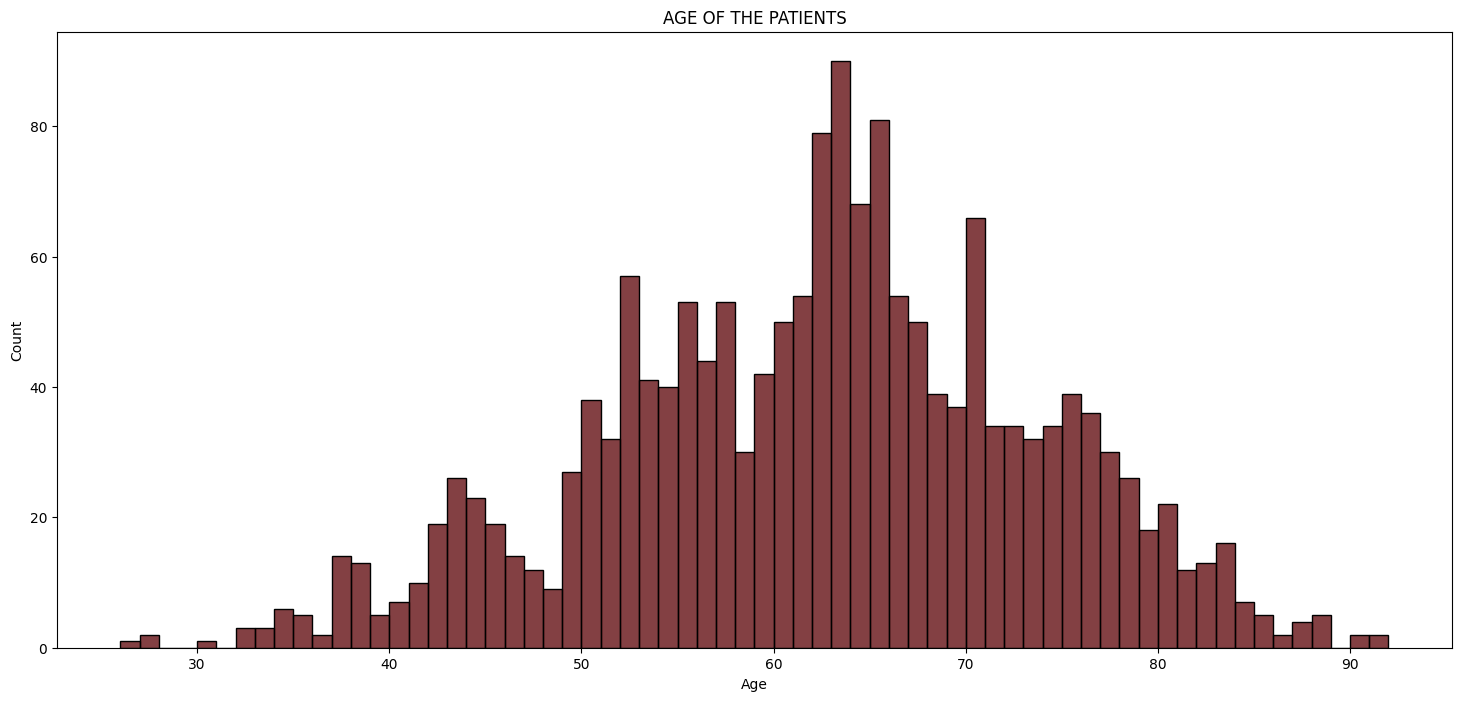

In [18]:
age_count = data['AGE'].value_counts().sort_index()
sorted_ages = data['AGE'].dropna().sort_values() #had to sort as they were unordered
plt.figure(figsize=(18,8)) #just making sure we have a big enough plot to display all ages clearly
sns.histplot(sorted_ages, binwidth = 1, color = "#590004")
plt.title("AGE OF THE PATIENTS")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

**SEX**

SEX
Male      1065
Female     635
Name: count, dtype: int64


Text(0, 0.5, 'Count')

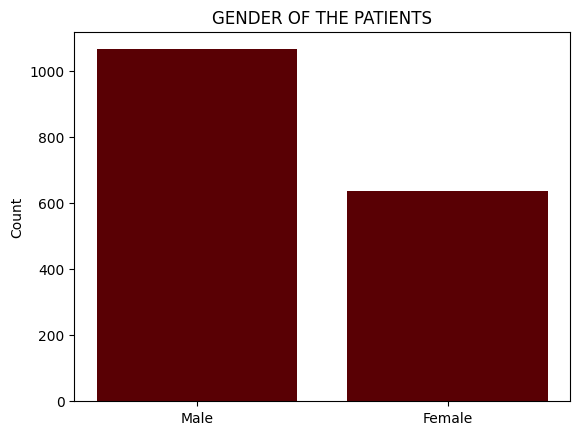

In [19]:
gender_count = data['SEX'].value_counts()
gender_count_map = gender_count.rename({0: 'Female', 1: 'Male'})
print(gender_count_map)

gender_categories = ['Male', 'Female']
plt.bar(gender_categories, gender_count, color = "#590004")
plt.title("GENDER OF THE PATIENTS")
plt.ylabel("Count")

**Previous Myocardial Infarctions**

INF_ANAM
0.0    1060
1.0     410
2.0     147
3.0      79
Name: count, dtype: int64


Text(0.5, 0, 'Number of Previous Myocardial Infarctions')

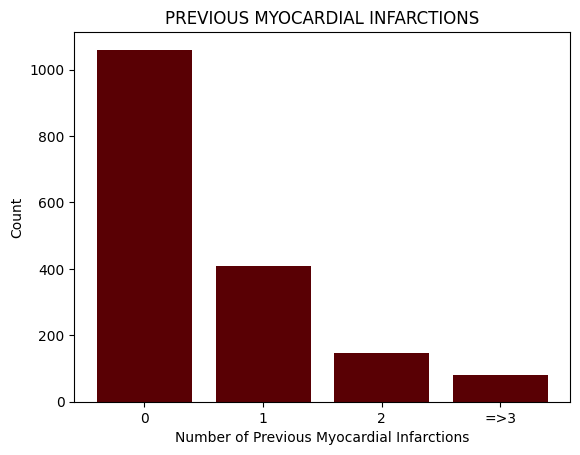

In [20]:

myo_infar_count = data['INF_ANAM'].value_counts()
myo_infar_map = myo_infar_count.rename({'0': '0', '1': '1', '2': '2', '3': '=>3'})
print(myo_infar_map)

myoinfar_categories = ['0', '1', '2', '=>3']
plt.bar(myoinfar_categories, myo_infar_count, color = "#590004")
plt.title("PREVIOUS MYOCARDIAL INFARCTIONS")
plt.ylabel("Count")
plt.xlabel("Number of Previous Myocardial Infarctions")

**Coronary Heard Disease**

IBS_POST
2.0    683
1.0    548
0.0    418
Name: count, dtype: int64


Text(0, 0.5, 'Count')

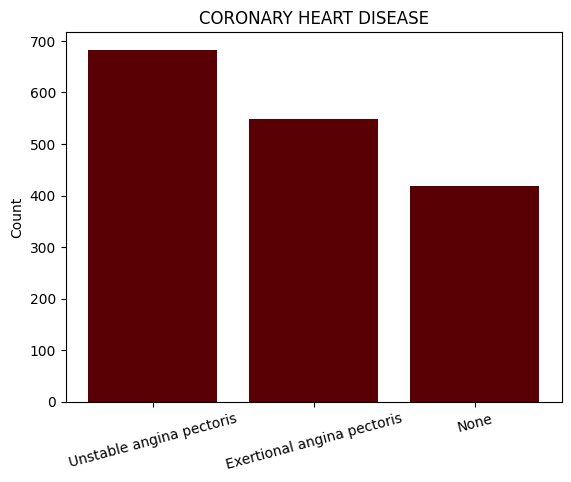

In [21]:
chd_count = data['IBS_POST'].value_counts()
chd_count_map = chd_count.rename({'0': 'None', "1": 'Exertional angina pectoris', '2': 'Unstable angina pectoris'})
print(chd_count_map)

chd_categories = ['Unstable angina pectoris', 'Exertional angina pectoris', 'None']
plt.bar(chd_categories, chd_count, color = "#590004")
plt.xticks(rotation = 15)
plt.title("CORONARY HEART DISEASE")
plt.ylabel("Count")

**Heredity**

In [22]:
# heredity_count = data['IBS_NASL'].value_counts()
# heredity_count_map = heredity_count.rename({'0': 'No', "1": 'Yes'})
# print(heredity_count_map)

# heredity_categories = ['No', 'Yes']
# plt.bar(heredity_categories, heredity_count, color = "#590004")
# plt.title("HEREDITY OF CHD")
# plt.ylabel("Count")
#many empty values here

**Diabetes**

endocr_01
0.0    1461
1.0     228
Name: count, dtype: int64


Text(0, 0.5, 'Count')

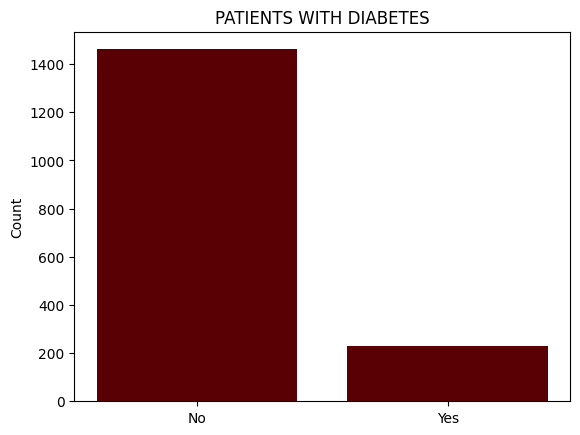

In [23]:
diabetes_count = data['endocr_01'].value_counts()
diabetes_count_map = diabetes_count.rename({'0': 'No', "1": 'Yes'})
print(diabetes_count_map)

diabetes_categories = ['No', 'Yes']
plt.bar(diabetes_categories, diabetes_count, color = "#590004")
plt.title("PATIENTS WITH DIABETES")
plt.ylabel("Count")

**Obesity**

endocr_02
0.0    1648
1.0      42
Name: count, dtype: int64


Text(0, 0.5, 'Count')

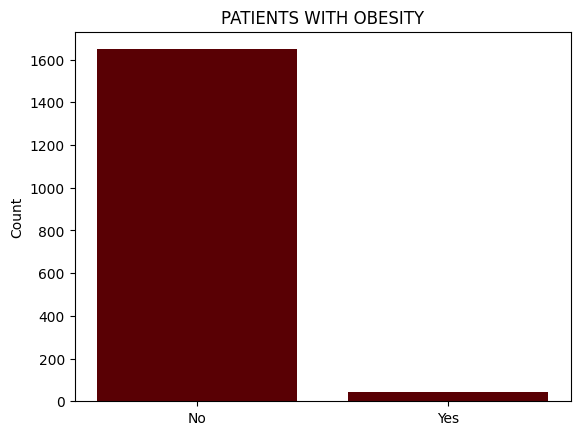

In [24]:
obesity_count = data['endocr_02'].value_counts()
obesity_count_map = obesity_count.rename({'0': 'No', "1": 'Yes'})
print(obesity_count_map)

obesity_categories = ['No', 'Yes']
plt.bar(obesity_categories, obesity_count, color = "#590004")
plt.title("PATIENTS WITH OBESITY")
plt.ylabel("Count")

**Administration of different drugs by ECT**

In [25]:
drugs = [("Opiod", 'NA_KB'), ("NSAIDs", 'NOT_NA_KB'), ("Lidocaine", 'LID_KB'), ("Liquid Nitrates", 'LID_KB')] #####
cols = []
for drug, column_name in drugs:
        column = data[column_name].sort_values()
        count = column.value_counts()
        print(f"{drug} administered: {count.get(1, 0)}")
        print(f"{drug} not administered: {count.get(0, 0)}")
        cols.append(column_name)
        print('\n')
drug_emergency_cols = data[cols]
null_counts = drug_emergency_cols.isnull().all().sum()
print(null_counts) #in all cases some drug was administred

Opiod administered: 618
Opiod not administered: 425


NSAIDs administered: 701
NSAIDs not administered: 313


Lidocaine administered: 396
Lidocaine not administered: 627


Liquid Nitrates administered: 396
Liquid Nitrates not administered: 627


0


**Administrarion of different drugs in the ICU**

In [26]:
drugs = [("opiod first hour", 'NA_R_1_n'), ("opiods second day", 'NA_R_2_n'), ("opiods third day", 'NA_R_3_n'), ("liquid nitrates", 'NITR_S'),
        ("NSAIDs first hours", "NOT_NA_1_n"), ("NSAIDs second day", 'NOT_NA_2_n'), ("NSAIDs third day", 'NOT_NA_3_n'), ("lidocaine", 'LID_S_n'), 
        ("beta-blockers", 'B_BLOK_S_n'), ("calcium channel blockers", 'ANT_CA_S_n'), ("anticoagulants", 'GEPAR_S_n'), ("acetylsalicylic", 'ASP_S_n'), 
         ("Ticlid", 'TIKL_S_n'), ("Trental", 'TRENT_S_n')]

#just counting if was administered or not - not how many times it was administered 
for drug, column_name in drugs:
    column = data[column_name].sort_values()
    count = column.value_counts()
    administered_count = np.sum(np.fromiter((count.get(i, 0) for i in range(1, 5)), dtype=int))  # Counting values greater than or equal to 1
    print(f"{drug} administered: {administered_count}")
    print(f"{drug} not administered: {count.get(0.0, 0)}")
    print('\n')

opiod first hour administered: 587
opiod first hour not administered: 1108


opiods second day administered: 118
opiods second day not administered: 1474


opiods third day administered: 76
opiods third day not administered: 1493


liquid nitrates administered: 195
liquid nitrates not administered: 1496


NSAIDs first hours administered: 453
NSAIDs first hours not administered: 1237


NSAIDs second day administered: 136
NSAIDs second day not administered: 1454


NSAIDs third day administered: 95
NSAIDs third day not administered: 1474


lidocaine administered: 479
lidocaine not administered: 1211


beta-blockers administered: 215
beta-blockers not administered: 1474


calcium channel blockers administered: 1125
calcium channel blockers not administered: 562


anticoagulants administered: 1203
anticoagulants not administered: 480


acetylsalicylic administered: 1252
acetylsalicylic not administered: 431


Ticlid administered: 30
Ticlid not administered: 1654


Trental administered: 341


In [27]:
drugs = [("opiod first hour", 'NA_R_1_n'), ("opiods second day", 'NA_R_2_n'), ("opiods third day", 'NA_R_3_n'), ("liquid nitrates", 'NITR_S'),
        ("NSAIDs second day", 'NOT_NA_2_n'), ("NSAIDs third day", 'NOT_NA_3_n'), ("lidocaine", 'LID_S_n'), ("beta-blockers", 'B_BLOK_S_n'),
        ("calcium channel blockers", 'ANT_CA_S_n'), ("anticoagulants", 'GEPAR_S_n'), ("acetylsalicylic", 'ASP_S_n'), ("Ticlid", 'TRENT_S_n')]
for drug, column_name in drugs:
        column = data[column_name].sort_values()
        count = column.value_counts()
        if drug == "NSAIDs second day":
            #special case handling for this column
            print(f"administration of NSAIDs in first hours of hospital period: {data['NOT_NA_1_n'].value_counts()}")
            print('\n')
        print(f"{drug} administered: {count.get(1, 0)}")
        print(f"{drug} not administered: {count.get(0, 0)}")
        print('\n')

opiod first hour administered: 409
opiod first hour not administered: 1108


opiods second day administered: 87
opiods second day not administered: 1474


opiods third day administered: 60
opiods third day not administered: 1493


liquid nitrates administered: 195
liquid nitrates not administered: 1496


administration of NSAIDs in first hours of hospital period: NOT_NA_1_n
0.0    1237
1.0     376
2.0      53
3.0      17
4.0       7
Name: count, dtype: int64


NSAIDs second day administered: 95
NSAIDs second day not administered: 1454


NSAIDs third day administered: 57
NSAIDs third day not administered: 1474


lidocaine administered: 479
lidocaine not administered: 1211


beta-blockers administered: 215
beta-blockers not administered: 1474


calcium channel blockers administered: 1125
calcium channel blockers not administered: 562


anticoagulants administered: 1203
anticoagulants not administered: 480


acetylsalicylic administered: 1252
acetylsalicylic not administered: 431


Ticlid

#### distribution of target variables (without lethal outcome) ####

Counts for FIBR_PREDS:
FIBR_PREDS
0.0    1530
1.0     170
Name: count, dtype: int64
Counts for PREDS_TAH:
PREDS_TAH
0.0    1680
1.0      20
Name: count, dtype: int64
Counts for JELUD_TAH:
JELUD_TAH
0.0    1658
1.0      42
Name: count, dtype: int64
Counts for FIBR_JELUD:
FIBR_JELUD
0.0    1629
1.0      71
Name: count, dtype: int64
Counts for A_V_BLOK:
A_V_BLOK
0.0    1643
1.0      57
Name: count, dtype: int64
Counts for OTEK_LANC:
OTEK_LANC
0.0    1541
1.0     159
Name: count, dtype: int64
Counts for RAZRIV:
RAZRIV
0.0    1646
1.0      54
Name: count, dtype: int64
Counts for DRESSLER:
DRESSLER
0.0    1625
1.0      75
Name: count, dtype: int64
Counts for ZSN:
ZSN
0.0    1306
1.0     394
Name: count, dtype: int64
Counts for REC_IM:
REC_IM
0.0    1541
1.0     159
Name: count, dtype: int64
Counts for P_IM_STEN:
P_IM_STEN
0.0    1552
1.0     148
Name: count, dtype: int64


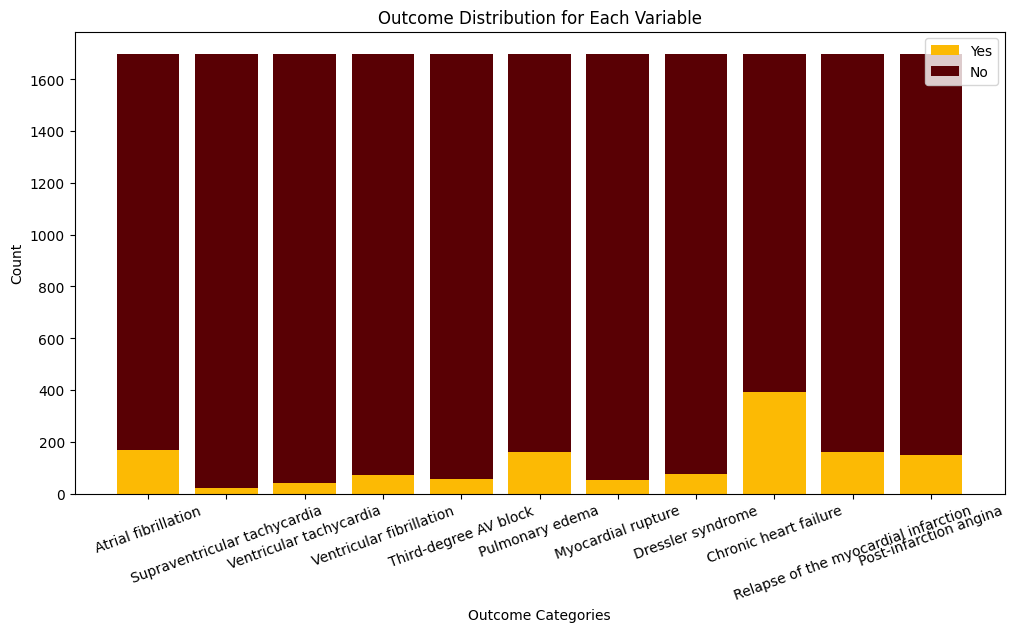

In [28]:
outcome = data[['FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN']]

categories = ["Atrial fibrillation", "Supraventricular tachycardia", "Ventricular tachycardia", "Ventricular fibrillation", "Third-degree AV block", 
              "Pulmonary edema", "Myocardial rupture", "Dressler syndrome", "Chronic heart failure", "Relapse of the myocardial infarction", 
              "Post-infarction angina"]
for column in outcome.columns:
    print(f"Counts for {column}:")
    print(outcome[column].value_counts())
    
yes_counts = outcome.eq(1).sum()
no_counts = outcome.eq(0).sum()

plt.figure(figsize=(12, 6))
plt.bar(categories, yes_counts, label='Yes', color="#FCBA04")
plt.bar(categories, no_counts, bottom=yes_counts, label='No', color = "#590004")
plt.title("Outcome Distribution for Each Variable")
plt.xlabel("Outcome Categories")
plt.ylabel("Count")
plt.xticks(rotation=20)
plt.legend()
plt.show()

**Lethal outcome**

LET_IS
Alive                                   1429
Cardiogenic shock                        110
Pulmonary edema                           18
Myocardial rupture                        54
Progress of congestive heart failure      23
Thromboembolism                           12
Asystole                                  27
Ventricular fibrillation                  27
Name: count, dtype: int64


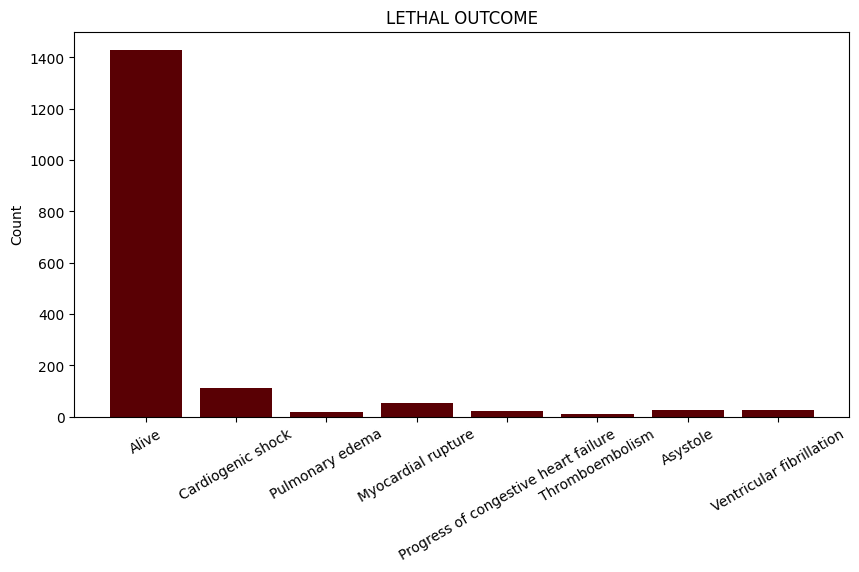

In [29]:
outcome_count = data['LET_IS'].value_counts().sort_index()
outcome_count_map = outcome_count.rename({0: 'Alive', 1: 'Cardiogenic shock', 2: 'Pulmonary edema',
                                          3: 'Myocardial rupture', 4: 'Progress of congestive heart failure',
                                          5: 'Thromboembolism', 6: 'Asystole', 7: 'Ventricular fibrillation'}) #####
print(outcome_count_map)
outcome_categories = ['Alive', 'Cardiogenic shock', 'Pulmonary edema', 'Myocardial rupture', 'Progress of congestive heart failure',
                                'Thromboembolism', 'Asystole', 'Ventricular fibrillation']
plt.figure(figsize=(10, 5))
plt.bar(outcome_categories, outcome_count, color = "#590004")
plt.title("LETHAL OUTCOME")
plt.xticks(rotation = 30)
plt.ylabel("Count")
plt.show()

**Time elapsed from beginning of heart attack to the hospital**

TIME_B_S
2-4h      198
4-6h      360
4-6h      175
6-8h       87
8-12h      92
12-24h    151
>1d       141
>2d       101
>3d       269
Name: count, dtype: int64


Text(0, 0.5, 'Count')

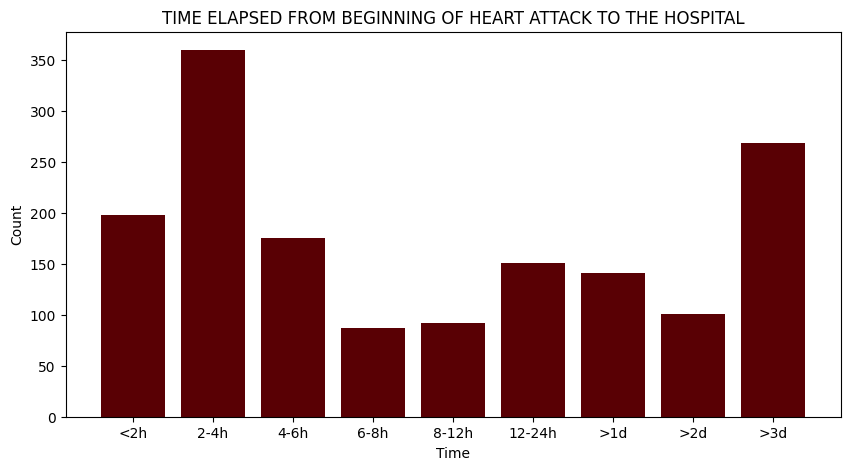

In [30]:
time_count = data['TIME_B_S'].value_counts().sort_index() ####
time_count_map = time_count.rename({0: '< 2h', 1: '2-4h', 2: '4-6h',
                                          3: '4-6h', 4: '6-8h',
                                          5: '8-12h', 6: '12-24h', 7: '>1d', 8: '>2d', 9: '>3d'}) #####
print(time_count_map) #####

time_categories = ["<2h", "2-4h", "4-6h", "6-8h", "8-12h", "12-24h", ">1d", ">2d", ">3d"]
plt.figure(figsize=(10,5))
plt.bar(time_categories, time_count, color = "#590004")
plt.title("TIME ELAPSED FROM BEGINNING OF HEART ATTACK TO THE HOSPITAL")
plt.xlabel("Time")
plt.ylabel("Count")

## **Impute Missing values**

Since the proportion of missing values is high in some features, simple imputation methods (mean, median, mode) may not be appropriate as they can introduce bias and distort the distribution of the data. Instead, a more sophisticated imputation is chosen, KNN Imputer

In [31]:
minimum_count_columns = data.count()[data.count() < 400].index.tolist()
print(minimum_count_columns)

[]


Get rid of features with too few entries to start with

In [32]:
minimum_count_columns = data.count()[data.count() > 400].index.tolist()
print(len(minimum_count_columns))
data = data[minimum_count_columns]
data_nulls_sum = data.isnull().sum() # check how many null values are in every feature

140


In [33]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

imputer = KNNImputer(n_neighbors=5)

# Iterate over features with missing values
for feature, count in data_nulls_sum.items():
    # Check if the feature has missing values
    if count > 0:
        # Impute missing values in the feature using KNNImputer
        data[feature] = imputer.fit_transform(data[[feature]])

# Save data with no missing values
data_imputed = data.copy()

# Check the accuracy of the imputer with cross validation
X = data_imputed.drop("LET_IS", axis=1)
y = data_imputed["LET_IS"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model Training and Cross-Validation
rf_model = RandomForestRegressor(random_state=42)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores = -cv_scores

# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = np.mean(cv_scores).round(3)
std_cv_score = np.std(cv_scores).round(3)
print("Cross-Validation Mean MSE:", mean_cv_score)
print("Cross-Validation Std Dev MSE:", std_cv_score)

Cross-Validation Mean MSE: 0.578
Cross-Validation Std Dev MSE: 0.192


In [34]:
# Check if there are still null or NA values
data_null = data.isnull().values.any() # no null values
data_NA = data.isna().values.any() # no NA values
print(data_null)
print(data_NA)

False
False


## Some correlation analysis between features

first I want to put our lethality variables into different categories

In [35]:
one_hot_data = pd.get_dummies(data['LET_IS'].astype(str))
column_mapping = {
    '0.0': 'unknown (alive)',
    '1.0': 'cardiogenic_shock',
    '2.0': 'pulmonary_edema',
    '3.0': 'myocardial_rupture',
    '4.0': 'poc_heart_failure',
    '5.0': 'thromboembolism',
    '6.0': 'asystole',
    '7.0': 'ventricular_fibrillation'
}

# Rename the columns using the mapping
one_hot_data = one_hot_data.rename(columns=column_mapping)
one_hot_data.drop(['unknown (alive)'],axis = 1, inplace = True)
data_modified = data.copy()
data_modified.drop(['LET_IS'],axis = 1, inplace = True)
data_modified = pd.concat([data_modified, one_hot_data], axis=1)

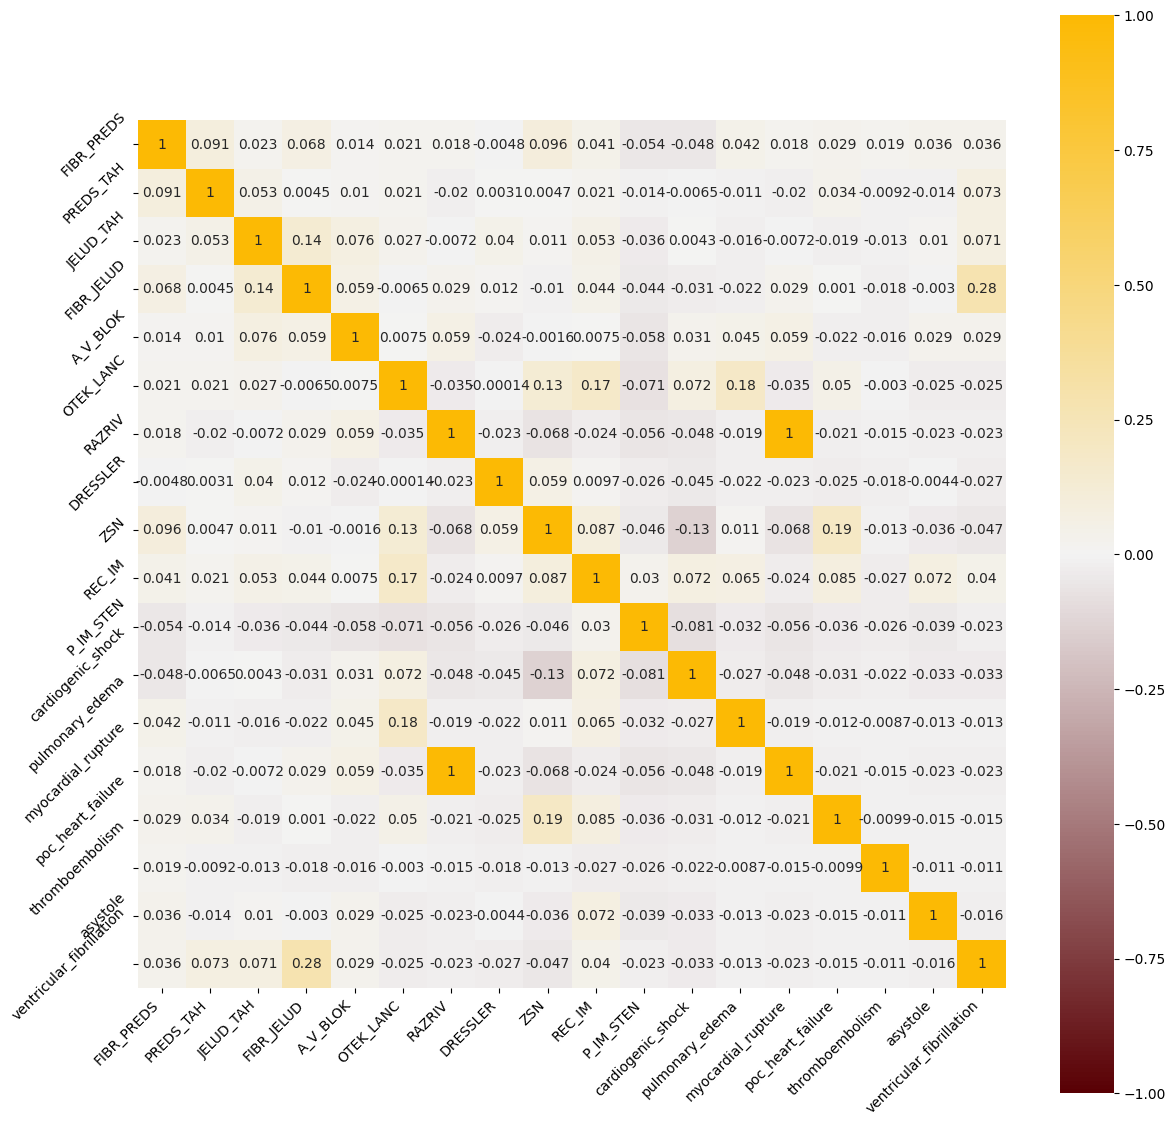

In [36]:
from matplotlib.colors import LinearSegmentedColormap
target_variables = ["FIBR_PREDS", "PREDS_TAH", "JELUD_TAH", "FIBR_JELUD", 
                   "A_V_BLOK", "OTEK_LANC", "RAZRIV", "DRESSLER", 
                   "ZSN", "REC_IM", "P_IM_STEN", "cardiogenic_shock","pulmonary_edema","myocardial_rupture","poc_heart_failure","thromboembolism","asystole","ventricular_fibrillation"]
corr = data_modified[target_variables].corr()

plt.figure(figsize=(14,14))
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#590004","#F3F3F3","#FCBA04" ])

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=custom_cmap,
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=45,
);

## Let's reassure ourselves, with some logistic regressions

In [37]:
data_modified['myocardial_rupture'] = data_modified['myocardial_rupture'].astype('category').cat.codes
data_modified['ventricular_fibrillation'] = data_modified['ventricular_fibrillation'].astype('category').cat.codes
data_modified['poc_heart_failure'] = data_modified['poc_heart_failure'].astype('category').cat.codes
data_modified['pulmonary_edema'] = data_modified['pulmonary_edema'].astype('category').cat.codes
data_modified['cardiogenic_shock'] = data_modified['cardiogenic_shock'].astype('category').cat.codes


In [38]:
import statsmodels.formula.api as sm
# logistic regression fit
reg = sm.logit(formula='myocardial_rupture ~ FIBR_PREDS + PREDS_TAH + JELUD_TAH + FIBR_JELUD + A_V_BLOK + OTEK_LANC + DRESSLER + ZSN + REC_IM + P_IM_STEN', data= data_modified).fit()
print(reg.summary())

         Current function value: 0.131809
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:     myocardial_rupture   No. Observations:                 1700
Model:                          Logit   Df Residuals:                     1689
Method:                           MLE   Df Model:                           10
Date:                Wed, 15 May 2024   Pseudo R-squ.:                 0.06402
Time:                        21:38:31   Log-Likelihood:                -224.07
converged:                      False   LL-Null:                       -239.40
Covariance Type:            nonrobust   LLR p-value:                 0.0006695
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.1352      0.168    -18.611      0.000      -3.465      -2.805
FIBR_PREDS     0.4136      0.421      0.983      0.326      -0.41

C:\Users\yoelh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Note: since RAZRIV is perfectly correlated with death due to myocardial rupture, we need to take it out of the regression

In [39]:
# logistic regression fit
reg = sm.logit(formula='ventricular_fibrillation ~ FIBR_PREDS + PREDS_TAH + JELUD_TAH + FIBR_JELUD + A_V_BLOK + OTEK_LANC + DRESSLER + RAZRIV + ZSN + REC_IM + P_IM_STEN', data= data_modified).fit()
print(reg.summary())

         Current function value: 0.061259
         Iterations: 35
                              Logit Regression Results                              
Dep. Variable:     ventricular_fibrillation   No. Observations:                 1700
Model:                                Logit   Df Residuals:                     1688
Method:                                 MLE   Df Model:                           11
Date:                      Wed, 15 May 2024   Pseudo R-squ.:                  0.2488
Time:                              21:38:31   Log-Likelihood:                -104.14
converged:                            False   LL-Null:                       -138.63
Covariance Type:                  nonrobust   LLR p-value:                 1.904e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.6249      0.313    -14.755      0.000      -5.239      -4.011
FIBR_PREDS     0.

C:\Users\yoelh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Here we can see, that ventricular fibrillation has the strongest (and most significant) impact

In [40]:
# logistic regression fit
reg = sm.logit(formula='poc_heart_failure ~ FIBR_PREDS + PREDS_TAH  + FIBR_JELUD + A_V_BLOK + OTEK_LANC + DRESSLER + RAZRIV + ZSN + REC_IM + P_IM_STEN', data= data_modified).fit()
print(reg.summary())

         Current function value: 0.052278
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:      poc_heart_failure   No. Observations:                 1700
Model:                          Logit   Df Residuals:                     1689
Method:                           MLE   Df Model:                           10
Date:                Wed, 15 May 2024   Pseudo R-squ.:                  0.2704
Time:                        21:38:32   Log-Likelihood:                -88.873
converged:                      False   LL-Null:                       -121.81
Covariance Type:            nonrobust   LLR p-value:                 2.757e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.5132      0.726     -8.969      0.000      -7.936      -5.090
FIBR_PREDS     0.0904      0.586      0.154      0.877      -1.05

C:\Users\yoelh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Once again we have the strongest effect from ZSN. However, REC_IM, relapse of myocardial infarction has a significant effect as well!

In [41]:
# logistic regression fit
reg = sm.logit(formula='pulmonary_edema ~ FIBR_PREDS + PREDS_TAH + JELUD_TAH + FIBR_JELUD + A_V_BLOK + OTEK_LANC + DRESSLER + RAZRIV + ZSN + REC_IM + P_IM_STEN', data= data_modified).fit()
print(reg.summary())

         Current function value: 0.046047
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:        pulmonary_edema   No. Observations:                 1700
Model:                          Logit   Df Residuals:                     1688
Method:                           MLE   Df Model:                           11
Date:                Wed, 15 May 2024   Pseudo R-squ.:                  0.2154
Time:                        21:38:32   Log-Likelihood:                -78.280
converged:                      False   LL-Null:                       -99.769
Covariance Type:            nonrobust   LLR p-value:                 1.096e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.3603      0.429    -12.496      0.000      -6.201      -4.520
FIBR_PREDS     1.0165      0.604      1.683      0.092      -0.16

C:\Users\yoelh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Even in this casethe right variable is significant and has the strongest effect on the desired lethal outcome. 
We can therefore say that our assumptions from the correlation analysis are not strongly affected by other complications

In [42]:
#now let's do the cardiogenic shock
reg = sm.logit(formula='cardiogenic_shock ~ FIBR_PREDS + PREDS_TAH + JELUD_TAH + FIBR_JELUD + A_V_BLOK + OTEK_LANC + DRESSLER + RAZRIV + ZSN + REC_IM + P_IM_STEN', data= data_modified).fit()
print(reg.summary())

         Current function value: 5.595116
         Iterations: 35


LinAlgError: Singular matrix

Here the regression fails if we add all complications. There are some ways to fix this, but for the moment I do not think that it is worth the time

## Dimensionality reduction complete

Explained Variance Ratio: [7.42327091e-01 1.03272148e-01 6.70528346e-02 3.85763794e-02
 2.32437866e-02 7.58452527e-03 5.40471062e-03 5.02920482e-03
 9.32426494e-04 5.69621379e-04 4.00071431e-04 3.66788995e-04
 3.56000815e-04 3.24545086e-04 2.89357245e-04 2.31191841e-04
 2.16916196e-04 1.99487379e-04 1.89977899e-04 1.72785469e-04
 1.55379934e-04 1.41931591e-04 1.33100570e-04 1.28150448e-04
 1.20786796e-04 1.09786126e-04 1.03577874e-04 1.01669815e-04
 9.71407196e-05 9.32128264e-05 8.53631028e-05 8.37388378e-05
 8.10602595e-05 7.97600531e-05 7.85245840e-05 7.72216930e-05
 7.04744483e-05 6.70051485e-05 6.58748876e-05 6.41931288e-05
 6.03925348e-05 5.71285607e-05 5.43817187e-05 5.26672180e-05
 4.93023838e-05 4.84528882e-05 4.74667815e-05 4.65718172e-05
 4.16988508e-05 3.95992003e-05 3.88387769e-05 3.67711615e-05
 3.50660931e-05 3.40749367e-05 3.26821506e-05 3.20852031e-05
 3.00546205e-05 2.74635562e-05 2.49738431e-05 2.43132399e-05
 2.40228922e-05 2.32226945e-05 2.13323971e-05 2.03362907e-0

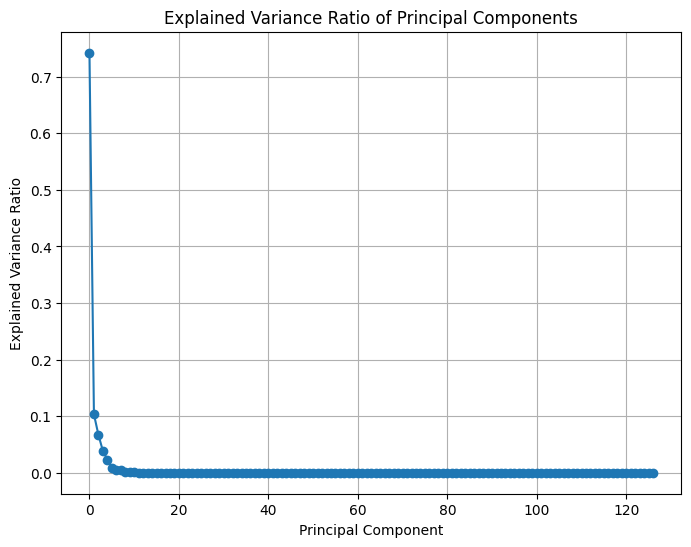

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Exclude 'ID' column
data = data.drop(columns=['ID'])

# Separate features
X = data.drop(columns=['FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 
                       'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS'])

# Apply PCA
pca = PCA()
pca.fit(X)

# Explained Variance Ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Visualization
plt.figure(figsize=(8, 6))
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.grid(True)

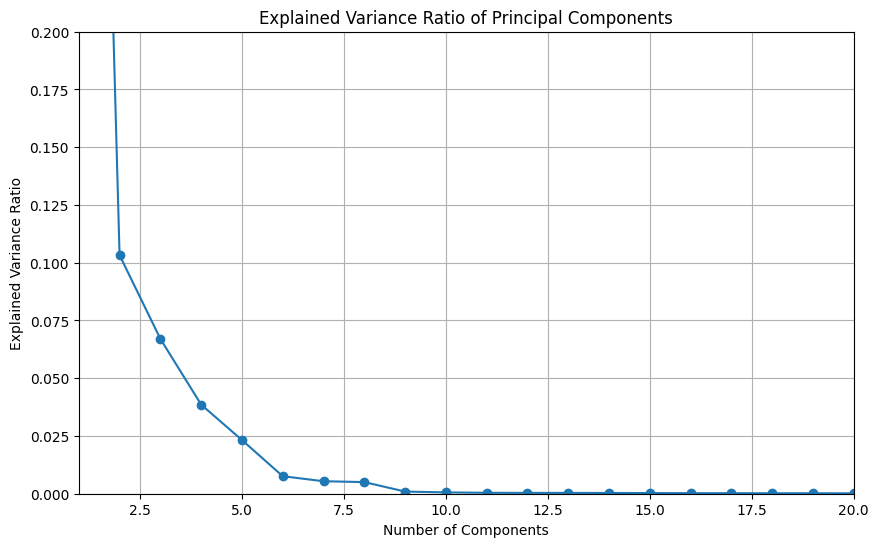

In [44]:
import numpy as np

# Generate a range of component numbers
n_components = len(pca.explained_variance_ratio_)
component_numbers = np.arange(1, n_components + 1)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(component_numbers, pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.grid(True)

# Zoom in on a specific range of components
plt.xlim(1, 20)  
plt.ylim(0, 0.2)  

plt.show()

In [45]:
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)

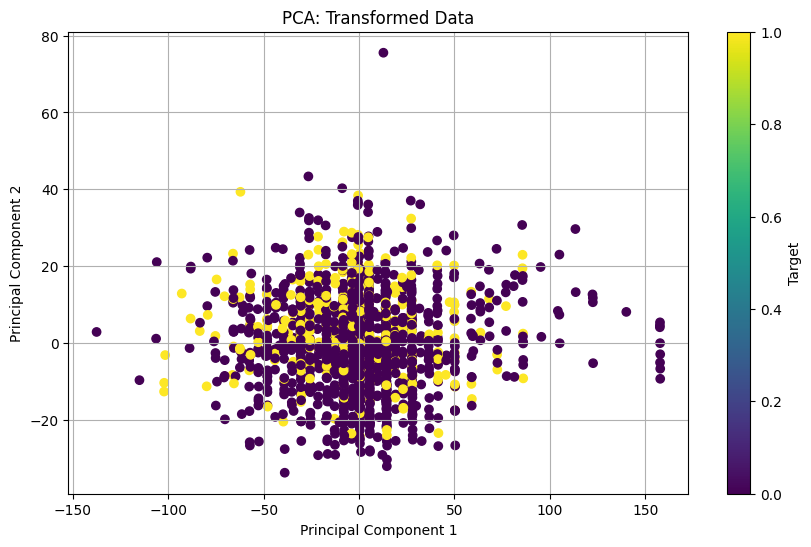

Loadings of each feature on the principal components:
[[-8.45431028e-03  1.19455536e-03  2.15178224e-03  2.40469887e-04
  -2.51901463e-05 -8.73512000e-03 -4.47437391e-04 -2.33851485e-02
  -1.84281063e-05  1.65065116e-05  1.05969781e-04  1.35366032e-05
  -1.16937898e-04 -1.46285010e-06  9.10052815e-05  1.18625298e-06
   1.47610084e-05  8.63306141e-05  6.26552848e-07 -1.06903905e-05
   8.23085250e-07  3.90648042e-05 -7.45320519e-04 -1.12292196e-04
  -3.92729174e-05 -6.88332383e-05  8.81113942e-04  6.10682622e-05
   2.88641542e-05 -6.09589992e-05 -8.79179366e-01 -4.75288891e-01
   6.02771161e-04  2.36222158e-03  3.53146389e-04  6.28929397e-05
   1.93351539e-04  3.20567054e-04  4.67684457e-04 -1.44362484e-03
   2.64706119e-04  4.89555866e-04 -5.68106233e-08  4.86967439e-04
   1.69811181e-04 -2.16764880e-04  3.69818953e-05 -2.59063761e-04
   1.05593471e-04  3.22170187e-04  6.48152679e-05  6.36973311e-05
   3.57130778e-05  1.78166164e-05  2.24553644e-05  2.18874887e-04
   7.35127403e-05  4.7

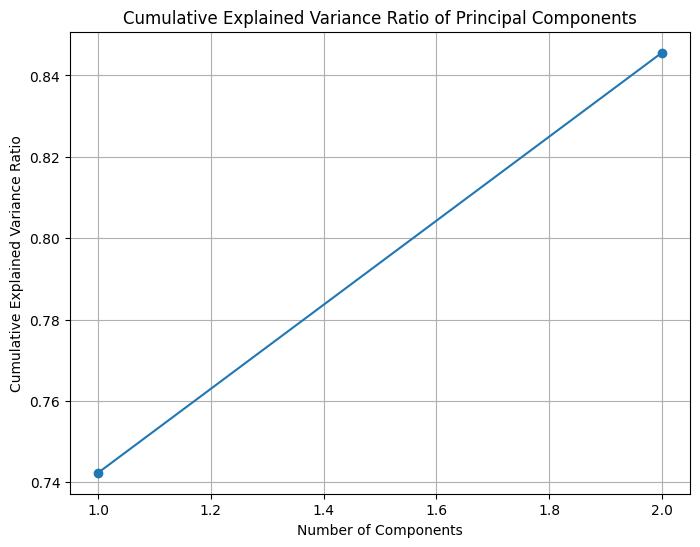

In [46]:
y = data['ZSN']
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Transformed Data')
plt.colorbar(label='Target')
plt.grid(True)
plt.show()
# Analyze the loadings of each feature on the principal components
loadings = pca.components_
print("Loadings of each feature on the principal components:")
print(loadings)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Create an array for the component numbers
component_numbers = np.arange(1, len(cumulative_variance_ratio) + 1)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(component_numbers, cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio of Principal Components')
plt.grid(True)
plt.show()

In [ ]:
# Print the coefficients of the first principal component
print("Coefficients of the first principal component:")
print(pca.components_[0])

Coefficients of the first principal component:
[-8.45431028e-03  1.19455536e-03  2.15178224e-03  2.40469887e-04
 -2.51901463e-05 -8.73512000e-03 -4.47437391e-04 -2.33851485e-02
 -1.84281063e-05  1.65065116e-05  1.05969781e-04  1.35366032e-05
 -1.16937898e-04 -1.46285010e-06  9.10052815e-05  1.18625298e-06
  1.47610084e-05  8.63306141e-05  6.26552848e-07 -1.06903905e-05
  8.23085250e-07  3.90648042e-05 -7.45320519e-04 -1.12292196e-04
 -3.92729174e-05 -6.88332383e-05  8.81113942e-04  6.10682622e-05
  2.88641542e-05 -6.09589992e-05 -8.79179366e-01 -4.75288891e-01
  6.02771161e-04  2.36222158e-03  3.53146389e-04  6.28929397e-05
  1.93351539e-04  3.20567054e-04  4.67684457e-04 -1.44362484e-03
  2.64706119e-04  4.89555866e-04 -5.68106233e-08  4.86967439e-04
  1.69811181e-04 -2.16764880e-04  3.69818953e-05 -2.59063761e-04
  1.05593471e-04  3.22170187e-04  6.48152679e-05  6.36973311e-05
  3.57130778e-05  1.78166164e-05  2.24553644e-05  2.18874887e-04
  7.35127403e-05  4.74248224e-05  6.6005945

In [47]:
explained_variance_ratio = pca.explained_variance_ratio_[:2]

print("Explained Variance Ratio:")
for i, ratio in enumerate(explained_variance_ratio):
  print(f"Principal Component {i+1}: {ratio:.4f}")

Explained Variance Ratio:
Principal Component 1: 0.7423
Principal Component 2: 0.1033


## dimensionality reduction diagnoses
Here we will only take the input variables which were not any administered drugs

In [48]:
features_of_interest = interview_columns.copy()
features_of_interest.extend(ICU_diagnoses)
features_of_interest.extend(emergency_diagnoses)

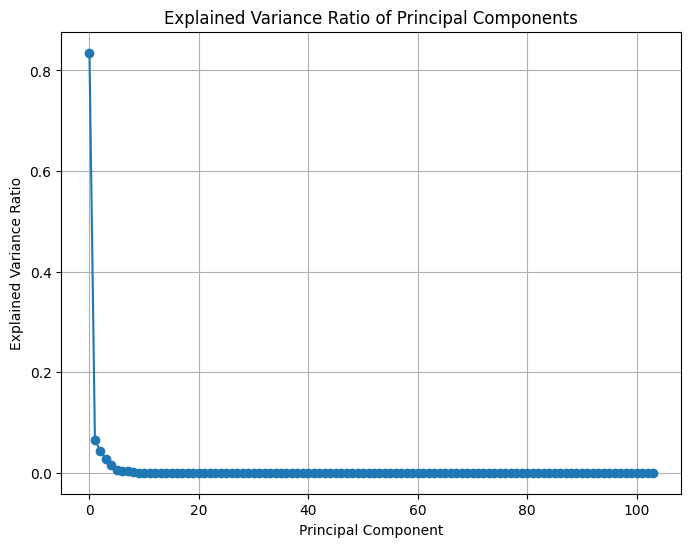

In [49]:
# Separate features
X = data[features_of_interest]

# Apply PCA
pca = PCA()
pca.fit(X)

# Visualization
plt.figure(figsize=(8, 6))
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.grid(True)
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)

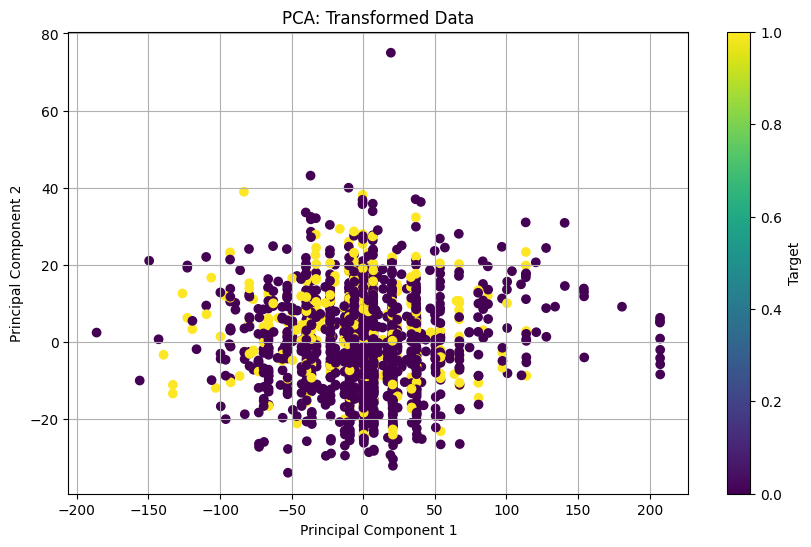

Loadings of each feature on the principal components:
[[-8.37939110e-03  9.47323946e-04  1.58337370e-03  1.46156744e-04
  -4.52217998e-05 -6.59041140e-03 -3.46383705e-04 -1.77741345e-02
  -1.76184001e-05  1.55478697e-05  8.11704716e-05  6.64521680e-06
  -9.13510416e-05 -1.61013720e-06  6.66374678e-05  1.72689996e-06
   1.05627428e-05  6.28751723e-05  1.36424868e-06 -8.26984801e-06
   6.07024267e-07  3.12510269e-05 -5.90231382e-04 -8.18071350e-05
  -2.73496796e-05 -4.23955231e-05  6.40475918e-04  5.64831996e-05
   2.02197033e-05 -4.81828465e-05 -2.59073817e-04 -1.37300570e-05
  -6.69404139e-05 -2.64839425e-05 -2.19926939e-04 -5.68820068e-05
  -1.08926482e-04  1.87908468e-04 -1.57176836e-04  2.17942095e-04
  -6.62892597e-01 -3.47097726e-01  4.45368310e-04  1.71888735e-03
   2.63973285e-04  4.67295806e-05  1.42024415e-04  2.42178596e-04
  -1.45572189e-03  1.05665008e-05  5.85859059e-05  1.54276720e-04
  -1.18557654e-03  2.67378434e-04 -1.81318936e-04  6.39581264e-05
  -3.15935792e-04  2.7

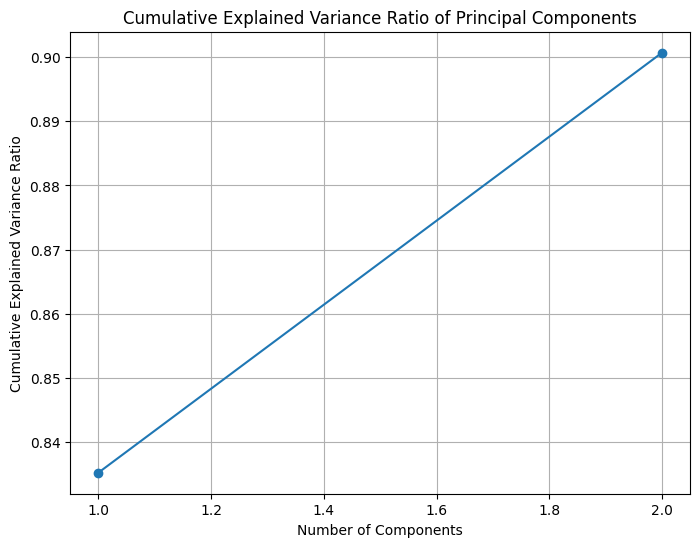

In [50]:
y = data['ZSN']
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Transformed Data')
plt.colorbar(label='Target')
plt.grid(True)
plt.show()
# Analyze the loadings of each feature on the principal components
loadings = pca.components_
print("Loadings of each feature on the principal components:")
print(loadings)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Create an array for the component numbers
component_numbers = np.arange(1, len(cumulative_variance_ratio) + 1)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(component_numbers, cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio of Principal Components')
plt.grid(True)
plt.show()

No major changes

## UMAP

Here you can play around with different target variables

C:\Users\yoelh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


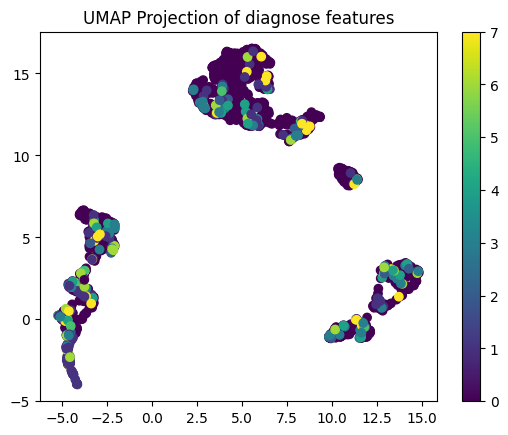

In [51]:
import umap 
umap_calculator = umap.UMAP(n_components=2)
umap_projection = umap_calculator.fit_transform(data[features_of_interest])

plt.scatter(umap_projection[:, 0], umap_projection[:, 1], c=data['LET_IS'], cmap='viridis')
plt.colorbar()
plt.title("UMAP Projection of diagnose features")
plt.show()

Unfortunately there is no obvious grouping for different outcomes.

# **DATA PREDICTION**

## **Most important features with Decision Tree and Random Forest**

Here we should produce dummy variables. Categorical variables should not be used in inference with ascending order if there is no meaning to it. --> We need to double check all categorical features

In [52]:
# Declare y and X
y = data_imputed["LET_IS"]
X = data_imputed[features_of_interest]
X.head()

,AGE,SEX,INF_ANAM,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,Angina during last year,Angina one year ago,Angina two years ago,Angina three years ago,Angina 4-5 years ago,Angina >5 years ago,stage I heart failure,stage II heart failure right vs,stage II heart failure left vs,stage IIB heart failure,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,anterior no QRS change,anterior QR,anterior Qr,anterior QS,lateral no QRS change,lateral QR,lateral Qr,lateral QS,inferior no QRS change,inferior QR,inferior Qr,inferior QS,posterior no QRS change,posterior QR,posterior Qr,posterior QS,IM_PG_P,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,S_AD_ORIT,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12
0,77.0,1.0,2.0,1.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False,False,False,False,False,False,False,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,4.7,0.0,138.0,0.481455,0.263717,8.000000,16.00000,4.0,0.0,0.0,1.0,180.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,55.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,120.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,0.0,1.0,3.5,0.0,132.0,0.380000,0.180000,7.800000,3.00000,2.0,0.0,0.0,0.0,120.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52.0,1.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,4.0,0.0,132.0,0.300000,0.110000,10.800000,13.44489,3.0,3.0,0.0,0.0,180.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,68.0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,True,False,False,False,120.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,0.0,1.0,3.9,0.0,146.0,0.750000,0.370000,8.782914,13.44489,2.0,0.0,0.0,1.0,120.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60.0,1.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,160.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,0.0,1.0,3.5,0.0,132.0,0.450000,0.220000,8.300000,13.44489,9.0,0.0,0.0,0.0,160.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

AGE                                0.063682
SEX                                0.000000
INF_ANAM                           0.014417
FK_STENOK                          0.001476
IBS_POST                           0.011406
GB                                 0.015279
SIM_GIPERT                         0.000000
DLIT_AG                            0.020350
nr_11                              0.000000
nr_01                              0.002535
nr_02                              0.005773
nr_03                              0.005882
nr_04                              0.012070
nr_07                              0.000000
nr_08                              0.000000
np_01                              0.000000
np_04                              0.000000
np_05                              0.000000
np_07                              0.000000
np_08                              0.000000
np_09                              0.000000
np_10                              0.007788
endocr_01                       

<Axes: >

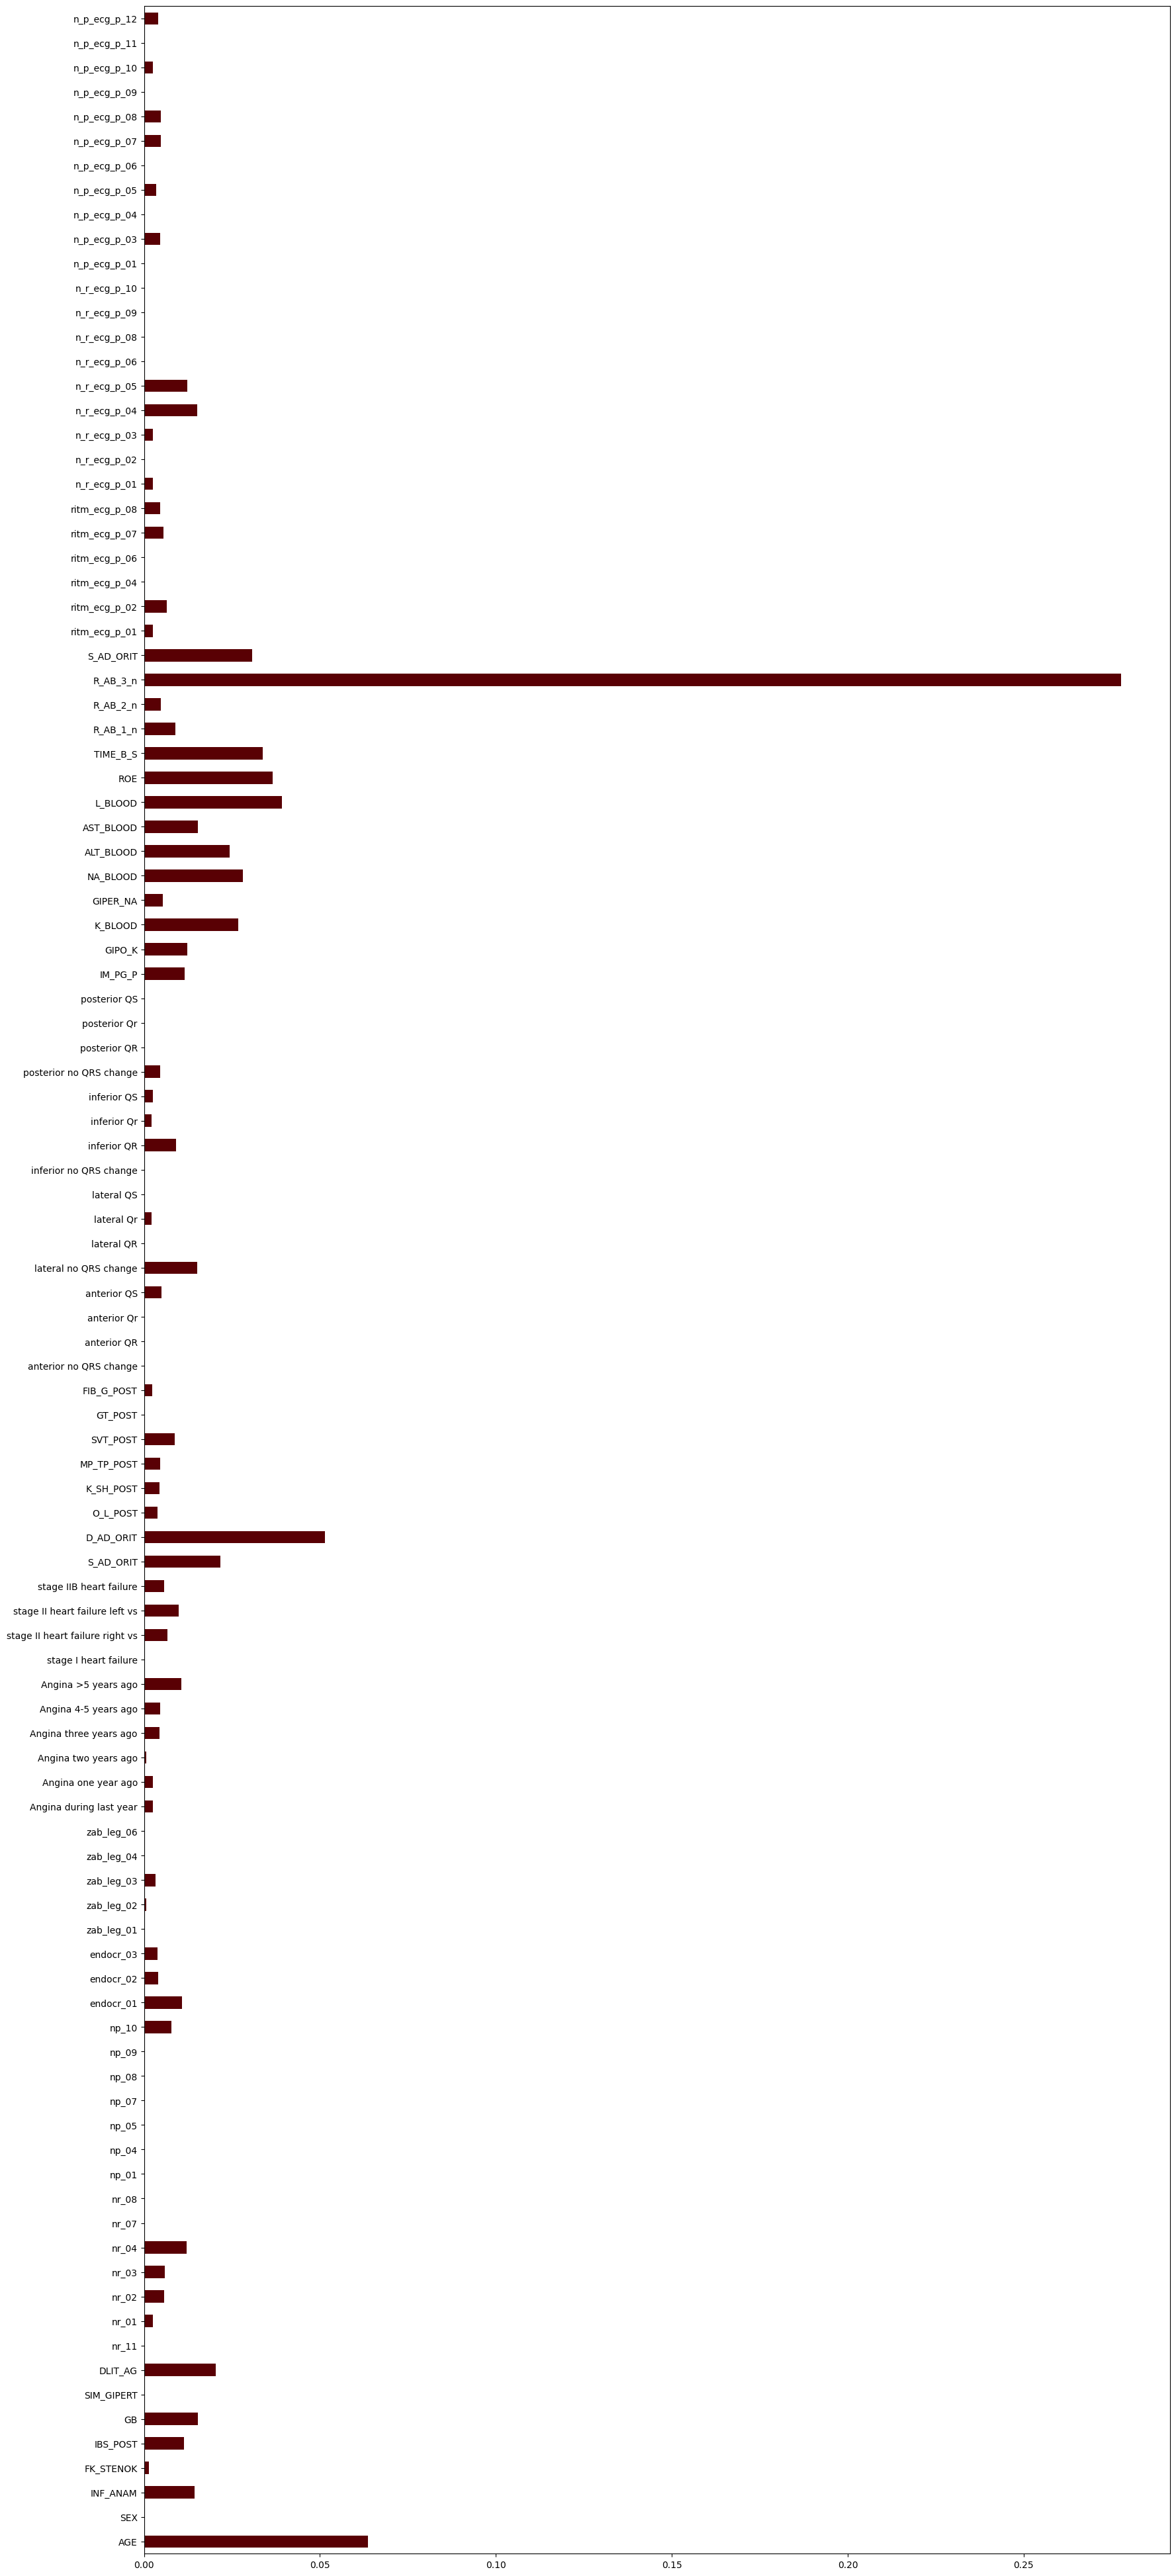

In [55]:
feat_importances_DT = pd.Series(model.feature_importances_, index=X_train.columns)
print(feat_importances_DT) #printing the feature importances because the other values are so small they do not show up on the graph
plt.figure(figsize=(20,50))
feat_importances_DT.plot(kind='barh', color = "#590004")

AGE                                0.041584
SEX                                0.009559
INF_ANAM                           0.016066
FK_STENOK                          0.013777
IBS_POST                           0.014845
GB                                 0.014353
SIM_GIPERT                         0.004882
DLIT_AG                            0.020269
nr_11                              0.001526
nr_01                              0.001490
nr_02                              0.001918
nr_03                              0.004492
nr_04                              0.008170
nr_07                              0.001468
nr_08                              0.003681
np_01                              0.003956
np_04                              0.002602
np_05                              0.001314
np_07                              0.003739
np_08                              0.004457
np_09                              0.002167
np_10                              0.003956
endocr_01                       

<Axes: >

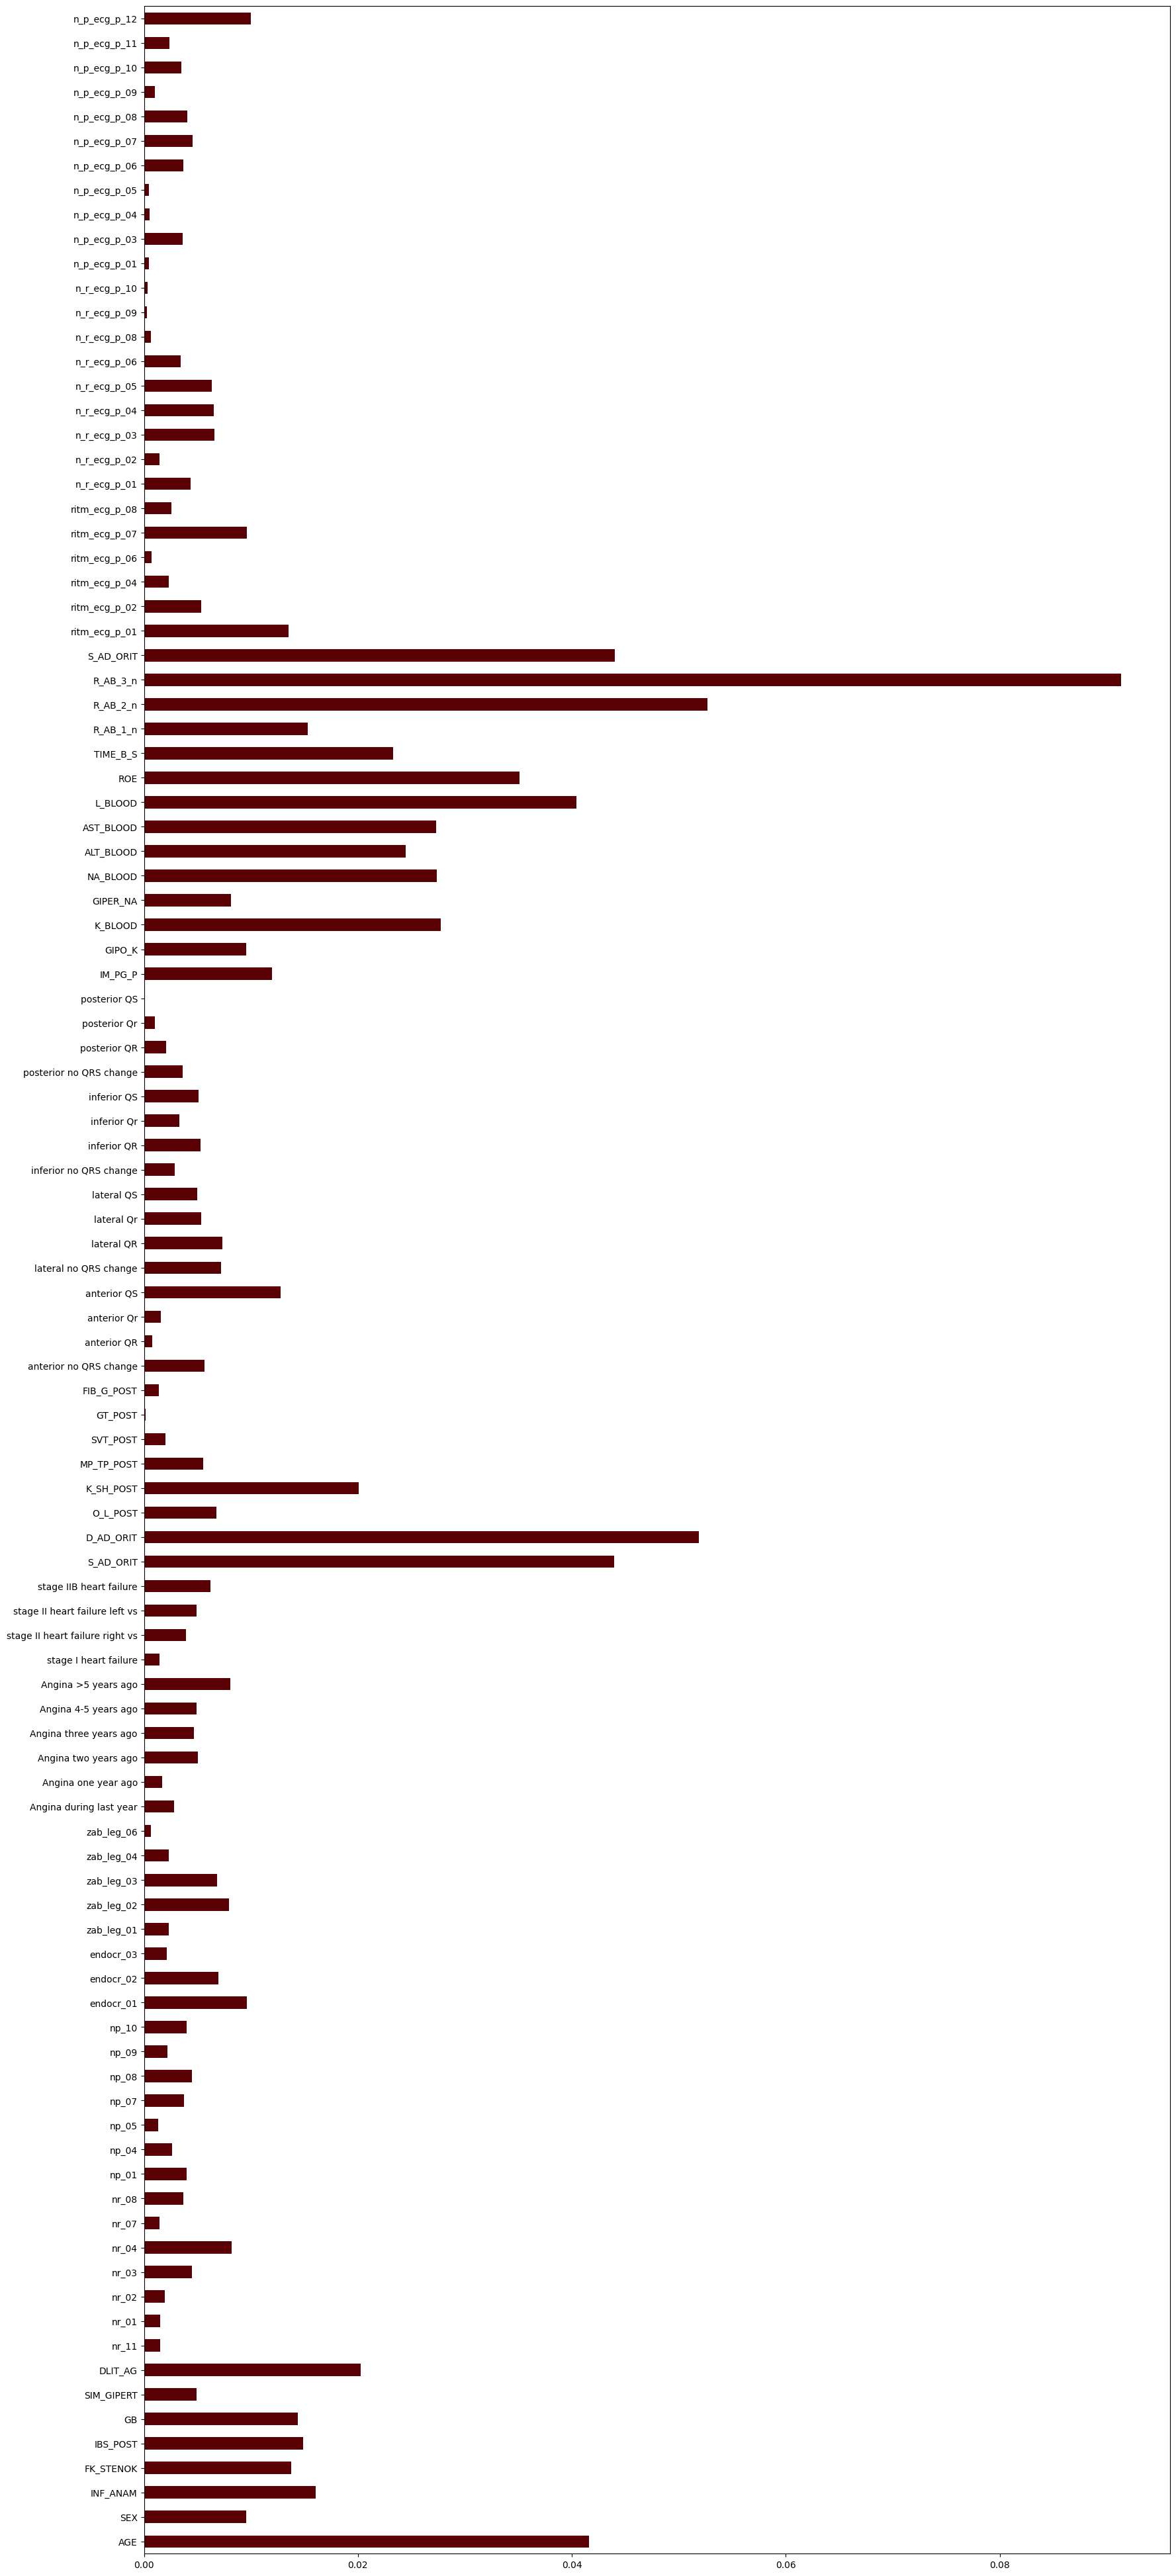

In [56]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train, y_train)
prediction = rfc.predict(X_test)
feat_importances_RF = pd.Series(rfc.feature_importances_, index=X_train.columns)
print(feat_importances_RF) #printing the feature importances because the other values are so small they do not show up on the graph
plt.figure(figsize=(20, 50))
feat_importances_RF.plot(kind='barh', color = "#590004")

In [57]:
#extracting columns where both decision tree and random forest were 0
zero_cols = (feat_importances_DT < 0.001) & (feat_importances_RF < 0.001)
zero_cols_names = (zero_cols[zero_cols].index.tolist())
print(len(zero_cols_names))
print(zero_cols_names)

11
['zab_leg_06', 'GT_POST', 'anterior QR', 'posterior QS', 'ritm_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_04', 'n_p_ecg_p_09']


In [58]:
print(feat_importances_DT.sort_values(ascending=False)[0:10]) #top 10 features
print(feat_importances_RF.sort_values(ascending=False)[0:10]) #top 10 features

R_AB_3_n     0.277638
AGE          0.063682
D_AD_ORIT    0.051427
L_BLOOD      0.039201
ROE          0.036502
TIME_B_S     0.033742
S_AD_ORIT    0.030782
NA_BLOOD     0.028124
K_BLOOD      0.026750
ALT_BLOOD    0.024384
dtype: float64
R_AB_3_n     0.091326
R_AB_2_n     0.052685
D_AD_ORIT    0.051892
S_AD_ORIT    0.043995
S_AD_ORIT    0.043968
AGE          0.041584
L_BLOOD      0.040401
ROE          0.035117
K_BLOOD      0.027714
NA_BLOOD     0.027371
dtype: float64


Relapse of pain in the third day of hospital period has the most weight, while the second strongest predictor is ambiguous

## **Prediction of Ventricular Fibrillation with SVM**

Detection of features most related to Ventricular fibrillation (just the ones obtained in the patient-doctor interview / medical history)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

# I took all features at admission and all features at ICU
X_svm = data_imputed[features_of_interest]
y_svm = data_imputed['FIBR_JELUD']
print(X_svm.shape)
print(y_svm.shape)

(1700, 104)
(1700,)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_svm, y_svm, test_size=0.2, random_state=42)

#SVM model
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(X_svm, y_svm.ravel())

# Get the coefficients associated with all features
coefficients = abs(svm_classifier.coef_[0])

# Create a dictionary to store features and their coefficients
feature_coefficients = {X.columns[i]: coefficients[i] for i in range(len(coefficients))}

# Sort coefficients
sorted_feature_coefficients = dict(sorted(feature_coefficients.items(), key=lambda x: x[1], reverse=True))

# Print all feature coefficients sorted by importance
for feature, importance in sorted_feature_coefficients.items():
    print(f"Feature: {feature}, Importance: {importance}")

Feature: n_r_ecg_p_10, Importance: 1.9985207819148831
Feature: SVT_POST, Importance: 0.49914389842016454
Feature: n_r_ecg_p_08, Importance: 0.48841899242381936
Feature: K_SH_POST, Importance: 0.12057012821449031
Feature: np_01, Importance: 0.049225255624680386
Feature: ritm_ecg_p_04, Importance: 0.041353238163781336
Feature: n_p_ecg_p_08, Importance: 0.03756443750643057
Feature: n_p_ecg_p_06, Importance: 0.03580646598662307
Feature: n_p_ecg_p_03, Importance: 0.032263726630975764
Feature: stage II heart failure right vs, Importance: 0.03202706093623098
Feature: endocr_03, Importance: 0.031514284952476324
Feature: stage IIB heart failure, Importance: 0.030003463128866183
Feature: endocr_01, Importance: 0.025943161142586213
Feature: nr_04, Importance: 0.02513177541811741
Feature: nr_02, Importance: 0.024826763540074265
Feature: ritm_ecg_p_07, Importance: 0.023824462466269125
Feature: GT_POST, Importance: 0.02326911965591156
Feature: n_p_ecg_p_04, Importance: 0.023239839504064618
Feature: 

{'n_r_ecg_p_10': 1.9985207819148831, 'SVT_POST': 0.49914389842016454, 'n_r_ecg_p_08': 0.48841899242381936, 'K_SH_POST': 0.12057012821449031, 'np_01': 0.049225255624680386}


C:\Users\yoelh\AppData\Local\Temp\ipykernel_324\1731809499.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Ventricular fibrillation on ECG at the time of admission',


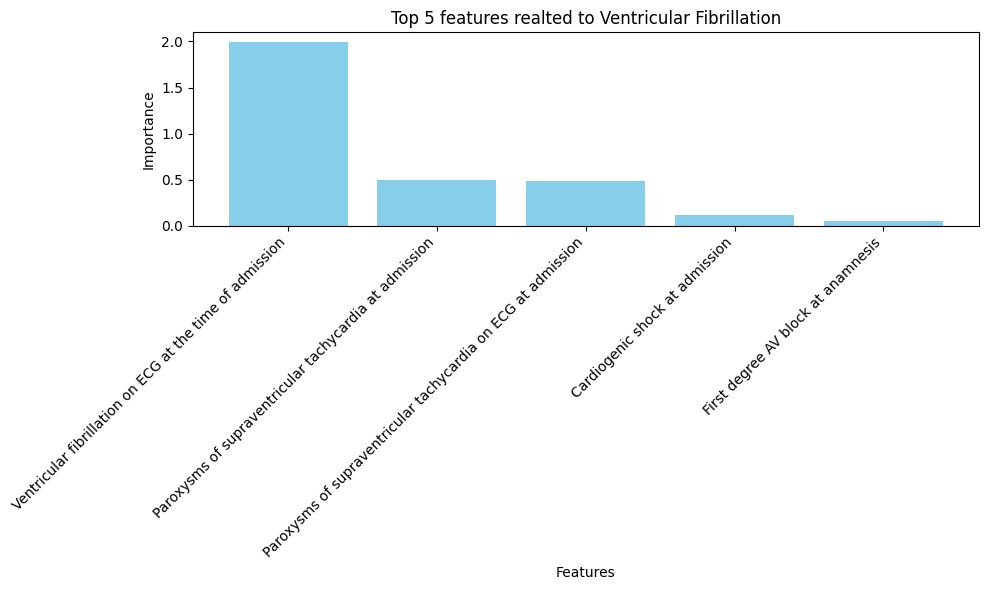

In [61]:
# Take the top 5 features
top_features = dict(list(sorted_feature_coefficients.items())[:5])
print(top_features)
# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features.keys(), top_features.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features realted to Ventricular Fibrillation')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['Ventricular fibrillation on ECG at the time of admission',
                           'Paroxysms of supraventricular tachycardia at admission',
                           'Paroxysms of supraventricular tachycardia on ECG at admission',
                           'Cardiogenic shock at admission',
                           'First degree AV block at anamnesis'], rotation=45, ha='right') # Renaming x-axis labels
#I think these names need correction to: Atrial fibrillation, Paroxysms of atrial fibrillation, Premature ventricular contractions, 
#irregular heartbeat and hypertension
plt.tight_layout()
plt.show()

In [62]:
# Prediction with y_test to check accuracy
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.961764705882353


In [63]:
# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       327
         1.0       0.00      0.00      0.00        13

    accuracy                           0.96       340
   macro avg       0.48      0.50      0.49       340
weighted avg       0.92      0.96      0.94       340

Mean Squared Error: 0.03823529411764706


C:\Users\yoelh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yoelh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yoelh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

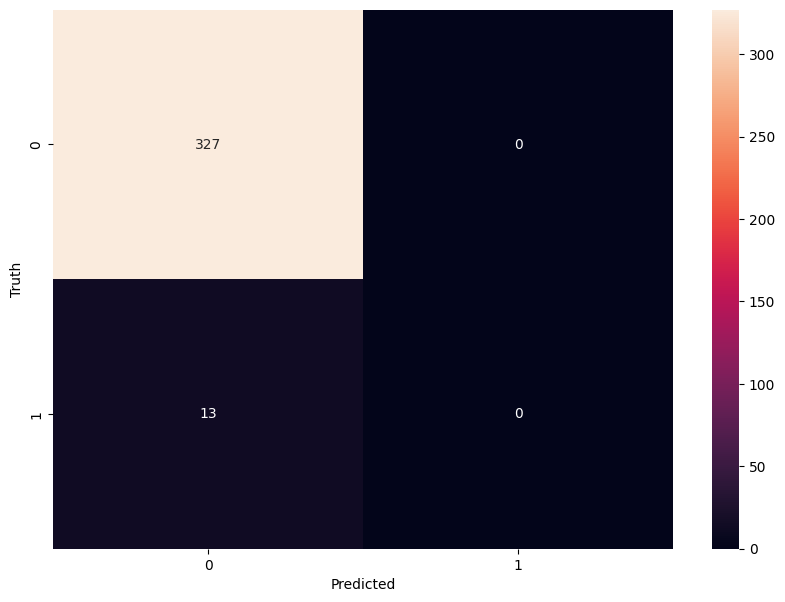

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

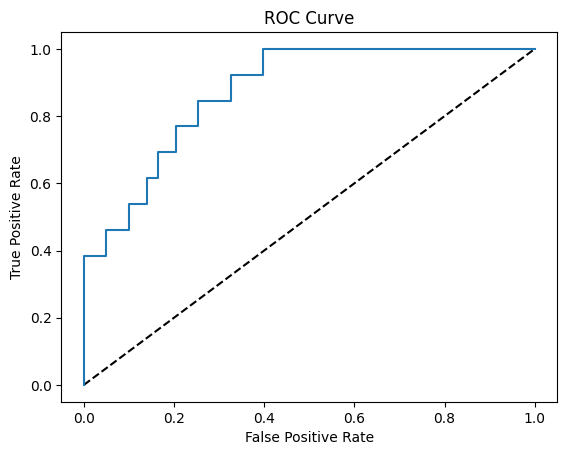

AUC:  0.8739120207010116


In [65]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the probabilities of the predictions
y_pred_proba = svm_classifier.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate and print the AUC
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC: ", auc)

## **Prediction of Atrial Fibrillation with SVM**

not relevant in our cases so i am not fixing this yet

In [66]:
X_svm1 = data_imputed[features_of_interest]
y_svm1 = data_imputed['FIBR_PREDS']
print(X_svm1.shape)
print(y_svm1.shape)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_svm1, y_svm1, test_size=0.2, random_state=42)

# SVM model
svm_classifier1 = SVC(kernel='linear', probability=True)
svm_classifier1.fit(X_svm1, y_svm1.ravel())

# Get the coefficients associated with all features
coefficients1 = abs(svm_classifier1.coef_[0])

# Create a dictionary to store features and their coefficients
feature_coefficients1 = {X_svm1.columns[i]: coefficients1[i] for i in range(len(coefficients1))}

# Sort coefficients
sorted_feature_coefficients1 = dict(sorted(feature_coefficients1.items(), key=lambda x: x[1], reverse=True))

# Print all feature coefficients sorted by importance
for feature, importance in sorted_feature_coefficients1.items():
    print(f"Feature: {feature}, Importance: {importance}")


(1700, 104)
(1700,)
Feature: nr_07, Importance: 0.9967984054686887
Feature: nr_01, Importance: 0.6268998105428958
Feature: n_p_ecg_p_08, Importance: 0.34364082057981665
Feature: ritm_ecg_p_02, Importance: 0.33944389177915585
Feature: n_r_ecg_p_05, Importance: 0.22990401679069122
Feature: np_01, Importance: 0.22880204274824673
Feature: nr_03, Importance: 0.1705082681975938
Feature: ritm_ecg_p_07, Importance: 0.16413511373076828
Feature: ritm_ecg_p_01, Importance: 0.1612487257614088
Feature: anterior QR, Importance: 0.16094032407563041
Feature: ritm_ecg_p_08, Importance: 0.1322942202509875
Feature: np_05, Importance: 0.10971697791968937
Feature: ritm_ecg_p_04, Importance: 0.10271820161083187
Feature: ritm_ecg_p_06, Importance: 0.10134232255643238
Feature: nr_11, Importance: 0.08443360120377541
Feature: np_08, Importance: 0.08129777574106327
Feature: n_r_ecg_p_08, Importance: 0.07389376648468876
Feature: posterior QR, Importance: 0.07376505875062822
Feature: n_r_ecg_p_10, Importance: 0.06

{'nr_07': 0.9967984054686887, 'nr_01': 0.6268998105428958, 'n_p_ecg_p_08': 0.34364082057981665, 'ritm_ecg_p_02': 0.33944389177915585, 'n_r_ecg_p_05': 0.22990401679069122}


C:\Users\yoelh\AppData\Local\Temp\ipykernel_324\4048590202.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Ventricle fibrillation in anamnesis',


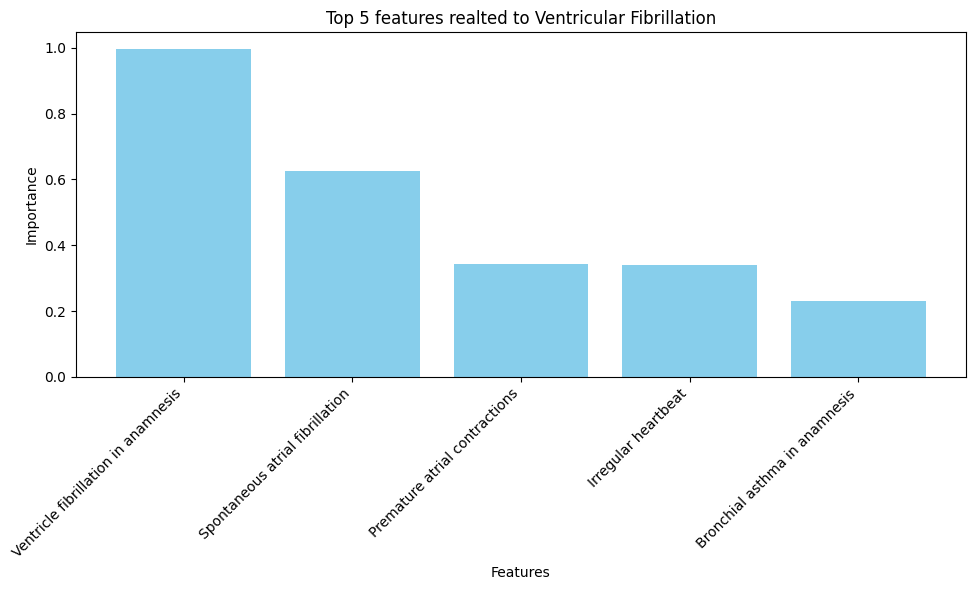

In [67]:
# Take the top 5 features
top_features1 = dict(list(sorted_feature_coefficients1.items())[:5])
print(top_features1)
# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features1.keys(), top_features1.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features realted to Ventricular Fibrillation')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['Ventricle fibrillation in anamnesis',
                           'Spontaneous atrial fibrillation',
                           'Premature atrial contractions',
                           'Irregular heartbeat',
                           'Bronchial asthma in anamnesis'], rotation=45, ha='right') # Renaming x-axis labels
plt.tight_layout()
plt.show()

In [ ]:
# Prediction with y_test to check accuracy
y_pred1 = svm_classifier1.predict(X_test1)

# Calculate accuracy
accuracy1 = accuracy_score(y_test1, y_pred1)
print("Accuracy:", accuracy1)

Accuracy: 0.8970588235294118


## **Prediction of Supraventricular tachycardia  with SVM**

Supraventricular tachycardia = irregular heartbeat - fast or erratic 

not relevant according to my ranking, so i am not fixing this yet

In [ ]:
# Choose "X" as the 33 features realted to Patient - Doctor Interview and "y" as Ventricular Fibrillation outcome
columns_drop2 = [
    'ID', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT',
    'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im',
    'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04',
    'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03',
    'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10',
    'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07',
    'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01',
    'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K',
    'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S',
    'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n',
    'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n',
    'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK',
    'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']
X_svm2= data_imputed.drop(columns_drop2, axis=1)
y_svm2 = data_imputed['PREDS_TAH']
print(X_svm2.shape)
print(y_svm2.shape)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_svm2, y_svm2, test_size=0.2, random_state=42)

# SVM model
svm_classifier2 = SVC(kernel='linear', probability=True)
svm_classifier2.fit(X_svm2, y_svm2.ravel())

# Get the coefficients associated with all features
coefficients2 = svm_classifier2.coef_[0]

# Create a dictionary to store features and their coefficients
feature_coefficients2 = {X_svm2.columns[i]: coefficients2[i] for i in range(len(coefficients2))}

# Sort coefficients
sorted_feature_coefficients2 = dict(sorted(feature_coefficients2.items(), key=lambda x: x[1], reverse=True))

# Print all feature coefficients sorted by importance
for feature, importance in sorted_feature_coefficients2.items():
    print(f"Feature: {feature}, Importance: {importance}")


(1700, 33)
(1700,)
Feature: zab_leg_02, Importance: 0.00036468749981288795
Feature: nr_11, Importance: 0.00035898444209991887
Feature: zab_leg_01, Importance: 0.00027214260396135614
Feature: endocr_01, Importance: 0.00024610027178351146
Feature: AGE, Importance: 2.7113240776088787e-05
Feature: IBS_POST, Importance: 2.500184978870834e-05
Feature: INF_ANAM, Importance: 2.4635342503742663e-05
Feature: zab_leg_03, Importance: 2.3941851113540302e-05
Feature: IBS_NASL, Importance: 7.993605777301127e-15
Feature: nr_01, Importance: 0.0
Feature: nr_03, Importance: 0.0
Feature: nr_04, Importance: 0.0
Feature: nr_07, Importance: 0.0
Feature: nr_08, Importance: 0.0
Feature: np_01, Importance: 0.0
Feature: np_04, Importance: 0.0
Feature: np_07, Importance: 0.0
Feature: np_08, Importance: 0.0
Feature: np_09, Importance: 0.0
Feature: np_10, Importance: 0.0
Feature: endocr_02, Importance: 0.0
Feature: endocr_03, Importance: 0.0
Feature: zab_leg_06, Importance: 0.0
Feature: FK_STENOK, Importance: -5.68

{'zab_leg_02': 0.00036468749981288795, 'nr_11': 0.00035898444209991887, 'zab_leg_01': 0.00027214260396135614, 'endocr_01': 0.00024610027178351146, 'AGE': 2.7113240776088787e-05}


C:\Users\jasmi\AppData\Local\Temp\ipykernel_10304\3857998957.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['obstructive chronic bronchitis in anamnesis',


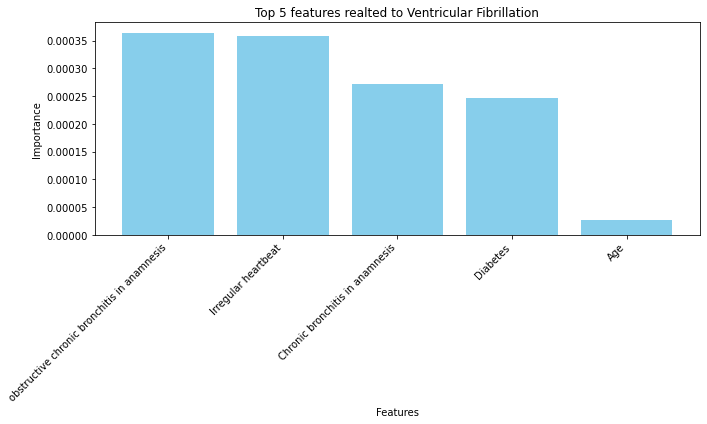

In [ ]:
# Take the top 5 features
top_features2 = dict(list(sorted_feature_coefficients2.items())[:5])
print(top_features2)
# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features2.keys(), top_features2.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features realted to Ventricular Fibrillation')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['obstructive chronic bronchitis in anamnesis',
                           'Irregular heartbeat',
                           'Chronic bronchitis in anamnesis',
                           'Diabetes',
                           'Age'], rotation=45, ha='right') # Renaming x-axis labels
plt.tight_layout()
plt.show()

In [ ]:
# Prediction with y_test to check accuracy
y_pred2= svm_classifier2.predict(X_test2)

# Calculate accuracy
accuracy2 = accuracy_score(y_test2, y_pred2)
print("Accuracy:", accuracy2)

Accuracy: 0.9911764705882353


## **Prediction of Ventricular tachycardia with SVM**

not relevant according to my ranking, so i am not fixing this now

In [ ]:
# Choose "X" as the 33 features realted to Patient - Doctor Interview and "y" as Ventricular Fibrillation outcome
columns_drop3 = [
    'ID', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT',
    'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im',
    'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04',
    'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03',
    'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10',
    'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07',
    'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01',
    'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K',
    'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S',
    'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n',
    'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n',
    'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK',
    'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']
X_svm3= data_imputed.drop(columns_drop3, axis=1)
y_svm3 = data_imputed['JELUD_TAH']
print(X_svm3.shape)
print(y_svm3.shape)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_svm3, y_svm3, test_size=0.2, random_state=42)

# SVM model
svm_classifier3 = SVC(kernel='linear', probability=True)
svm_classifier3.fit(X_svm3, y_svm3.ravel())

# Get the coefficients associated with all features
coefficients3 = svm_classifier3.coef_[0]

# Create a dictionary to store features and their coefficients
feature_coefficients3 = {X_svm3.columns[i]: coefficients3[i] for i in range(len(coefficients3))}

# Sort coefficients
sorted_feature_coefficients3 = dict(sorted(feature_coefficients3.items(), key=lambda x: x[1], reverse=True))

# Print all feature coefficients sorted by importance
for feature, importance in sorted_feature_coefficients3.items():
    print(f"Feature: {feature}, Importance: {importance}")


(1700, 33)
(1700,)
Feature: np_08, Importance: 0.0017743305221962213
Feature: endocr_02, Importance: 0.0008610764914920299
Feature: SEX, Importance: 0.0006755146106982579
Feature: zab_leg_02, Importance: 0.000498928564766743
Feature: nr_11, Importance: 0.00044220191189525693
Feature: endocr_01, Importance: 0.0001891281618950913
Feature: IBS_NASL, Importance: 0.00012882473598807564
Feature: DLIT_AG, Importance: 4.245225490251414e-06
Feature: nr_01, Importance: 0.0
Feature: nr_07, Importance: 0.0
Feature: nr_08, Importance: 0.0
Feature: np_01, Importance: 0.0
Feature: np_04, Importance: 0.0
Feature: np_05, Importance: 0.0
Feature: np_07, Importance: 0.0
Feature: np_09, Importance: 0.0
Feature: np_10, Importance: 0.0
Feature: endocr_03, Importance: 0.0
Feature: zab_leg_03, Importance: 0.0
Feature: zab_leg_04, Importance: 0.0
Feature: zab_leg_06, Importance: 0.0
Feature: zab_leg_01, Importance: -6.765576259448736e-06
Feature: AGE, Importance: -1.977909869310679e-05
Feature: nr_02, Importan

{'np_08': 0.0017743305221962213, 'endocr_02': 0.0008610764914920299, 'SEX': 0.0006755146106982579, 'zab_leg_02': 0.000498928564766743, 'nr_11': 0.00044220191189525693}


C:\Users\jasmi\AppData\Local\Temp\ipykernel_10304\637754266.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Complete LBBB in anamnesis',


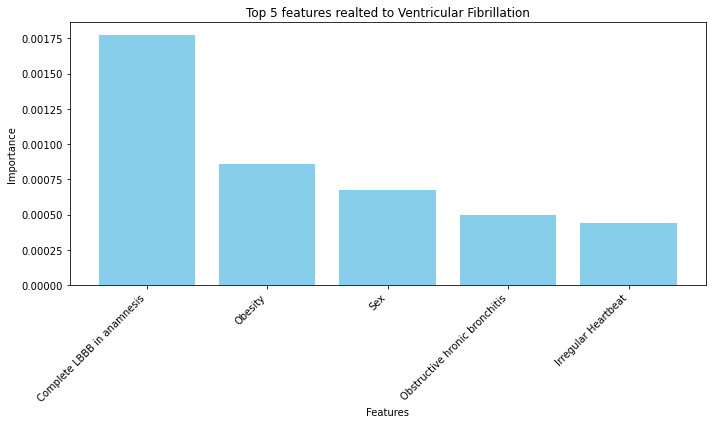

In [ ]:
# Take the top 5 features
top_features3 = dict(list(sorted_feature_coefficients3.items())[:5])
print(top_features3)
# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features3.keys(), top_features3.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features realted to Ventricular Fibrillation')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['Complete LBBB in anamnesis',
                           'Obesity',
                           'Sex',
                           'Obstructive hronic bronchitis',
                           'Irregular Heartbeat'], rotation=45, ha='right') # Renaming x-axis labels
plt.tight_layout()
plt.show()

In [ ]:
# Prediction with y_test to check accuracy
y_pred3= svm_classifier3.predict(X_test3)

# Calculate accuracy
accuracy3 = accuracy_score(y_test3, y_pred3)
print("Accuracy:", accuracy3)

Accuracy: 0.9882352941176471


## **Prediction of Third-degree AV block with SVM**

complete loss of communication between atria and ventricles

not relevant according to my ranking so i am not fixing this yet

In [ ]:
# Choose "X" as the 33 features related to Patient - Doctor Interview and "y" as Atrioventricular Block outcome
columns_drop4 = [
    'ID', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT',
    'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im',
    'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04',
    'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03',
    'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10',
    'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07',
    'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01',
    'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K',
    'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S',
    'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n',
    'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n',
    'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK',
    'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']
X_svm4 = data_imputed.drop(columns_drop4, axis=1)
y_svm4 = data_imputed['A_V_BLOK']
print(X_svm4.shape)
print(y_svm4.shape)

X_train4, X_test4, y_train4, y_test4 = train_test_split(X_svm4, y_svm4, test_size=0.2, random_state=42)

# SVM model
svm_classifier4 = SVC(kernel='linear', probability=True)
svm_classifier4.fit(X_train4, y_train4)

# Get the coefficients associated with all features
coefficients4 = svm_classifier4.coef_[0]

# Create a dictionary to store features and their coefficients
feature_coefficients4 = {X_svm4.columns[i]: coefficients4[i] for i in range(len(coefficients4))}

# Sort coefficients
sorted_feature_coefficients4 = dict(sorted(feature_coefficients4.items(), key=lambda x: x[1], reverse=True))

# Print all feature coefficients sorted by importance
for feature, importance in sorted_feature_coefficients4.items():
    print(f"Feature: {feature}, Importance: {importance}")


(1700, 33)
(1700,)
Feature: zab_leg_02, Importance: 0.0004705539076210741
Feature: zab_leg_06, Importance: 0.0003384678093452109
Feature: endocr_01, Importance: 0.00022832687800455886
Feature: zab_leg_01, Importance: 0.00017139045109981765
Feature: SEX, Importance: 0.00012783623042622594
Feature: IBS_POST, Importance: 8.740346987679004e-05
Feature: FK_STENOK, Importance: 1.3461186162189165e-05
Feature: AGE, Importance: 5.2590007726394106e-06
Feature: nr_01, Importance: 0.0
Feature: nr_04, Importance: 0.0
Feature: nr_07, Importance: 0.0
Feature: nr_08, Importance: 0.0
Feature: np_01, Importance: 0.0
Feature: np_04, Importance: 0.0
Feature: np_05, Importance: 0.0
Feature: np_07, Importance: 0.0
Feature: np_09, Importance: 0.0
Feature: np_10, Importance: 0.0
Feature: IBS_NASL, Importance: -1.0658141036401503e-14
Feature: nr_02, Importance: -2.0771034788426637e-05
Feature: STENOK_AN, Importance: -2.1354987502775202e-05
Feature: nr_03, Importance: -3.550357602601084e-05
Feature: DLIT_AG, Im

{'zab_leg_02': 0.0004705539076210741, 'zab_leg_06': 0.0003384678093452109, 'endocr_01': 0.00022832687800455886, 'zab_leg_01': 0.00017139045109981765, 'SEX': 0.00012783623042622594}


C:\Users\jasmi\AppData\Local\Temp\ipykernel_10304\3844666425.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['obstructive chronic bronchitis in anamnesis',


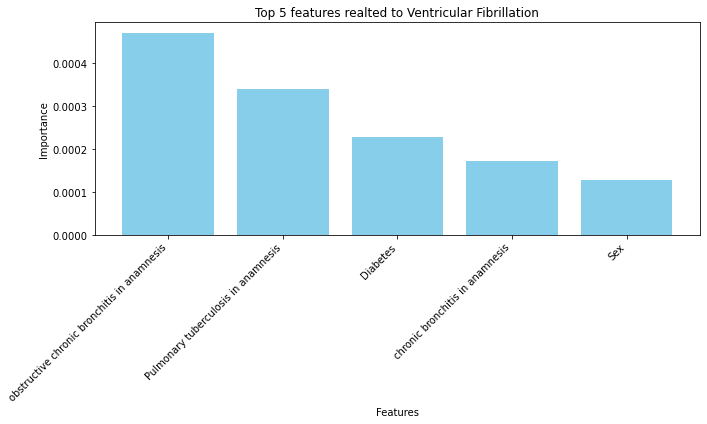

In [ ]:
# Take the top 5 features
top_features4= dict(list(sorted_feature_coefficients4.items())[:5])
print(top_features4)
# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features4.keys(), top_features4.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features realted to Ventricular Fibrillation')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['obstructive chronic bronchitis in anamnesis',
                           'Pulmonary tuberculosis in anamnesis',
                           'Diabetes',
                           'chronic bronchitis in anamnesis',
                           'Sex'], rotation=45, ha='right') # Renaming x-axis labels
plt.tight_layout()
plt.show()

In [ ]:
y_pred4= svm_classifier4.predict(X_test4)

# Calculate accuracy
accuracy4 = accuracy_score(y_test4, y_pred4)
print("Accuracy:", accuracy4)

Accuracy: 0.9676470588235294


## **Prediction of Pulmonary edema with SVM**

excessive fluid in the lungs

In [68]:
X_svm5= data_imputed[features_of_interest]
y_svm5 = data_imputed['OTEK_LANC']
print(X_svm5.shape)
print(y_svm5.shape)

X_train5, X_test5, y_train5, y_test5 = train_test_split(X_svm5, y_svm5, test_size=0.2, random_state=42)

# SVM model
svm_classifier5 = SVC(kernel='linear', probability=True)
svm_classifier5.fit(X_train5, y_train5)

# Get the coefficients associated with all features
coefficients5 = abs(svm_classifier5.coef_[0])

# Create a dictionary to store features and their coefficients
feature_coefficients5 = {X_svm5.columns[i]: coefficients5[i] for i in range(len(coefficients5))}

# Sort coefficients
sorted_feature_coefficients5 = dict(sorted(feature_coefficients5.items(), key=lambda x: x[1], reverse=True))

# Print all feature coefficients sorted by importance
for feature, importance in sorted_feature_coefficients5.items():
    print(f"Feature: {feature}, Importance: {importance}")


(1700, 104)
(1700,)
Feature: np_04, Importance: 0.5190150634119267
Feature: nr_08, Importance: 0.48338018941975663
Feature: nr_01, Importance: 0.1353974014893382
Feature: n_p_ecg_p_08, Importance: 0.09482358827388163
Feature: zab_leg_04, Importance: 0.07777280432503253
Feature: GT_POST, Importance: 0.06721672427562586
Feature: n_r_ecg_p_09, Importance: 0.05990714678559215
Feature: ritm_ecg_p_08, Importance: 0.04643892524878336
Feature: GIPER_NA, Importance: 0.04641342238056234
Feature: n_r_ecg_p_02, Importance: 0.0435906242826551
Feature: n_r_ecg_p_10, Importance: 0.041777788754525834
Feature: np_05, Importance: 0.04056163733509952
Feature: nr_04, Importance: 0.040514539661860915
Feature: stage I heart failure, Importance: 0.040124803710256174
Feature: K_SH_POST, Importance: 0.039426133337051104
Feature: n_p_ecg_p_11, Importance: 0.03642542695208771
Feature: SIM_GIPERT, Importance: 0.036371788523770654
Feature: n_p_ecg_p_09, Importance: 0.03454412654748468
Feature: Angina three years a

{'np_04': 0.5190150634119267, 'nr_08': 0.48338018941975663, 'nr_01': 0.1353974014893382, 'n_p_ecg_p_08': 0.09482358827388163, 'zab_leg_04': 0.07777280432503253}


C:\Users\yoelh\AppData\Local\Temp\ipykernel_324\2790304390.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Third-degree AV block in anamnesis',


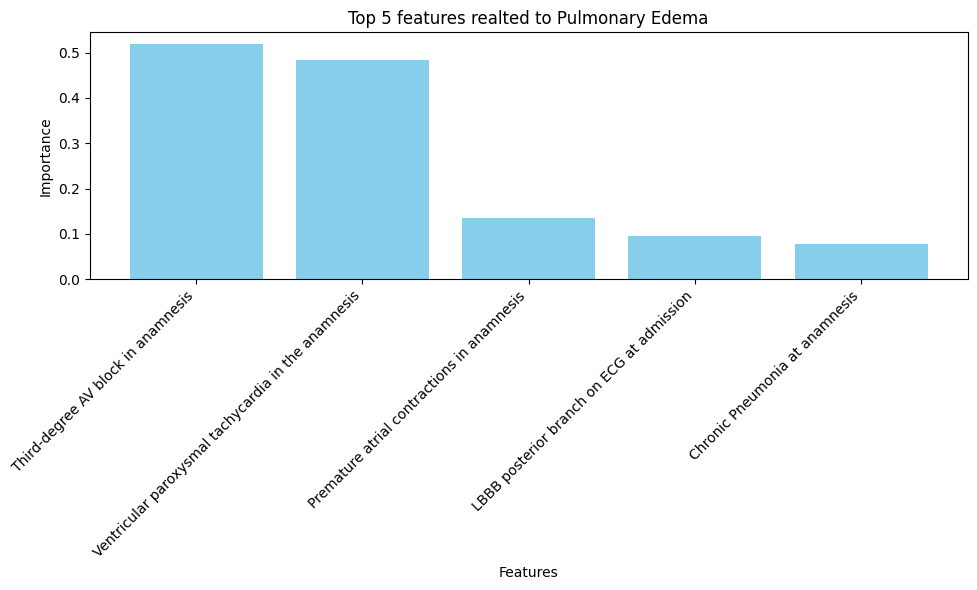

In [70]:
# Take the top 5 features
top_features5= dict(list(sorted_feature_coefficients5.items())[:5])
print(top_features5)
# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features5.keys(), top_features5.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features realted to Pulmonary Edema')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['Third-degree AV block in anamnesis',
                           'Ventricular paroxysmal tachycardia in the anamnesis',
                           'Premature atrial contractions in anamnesis',
                           'LBBB posterior branch on ECG at admission',
                           'Chronic Pneumonia at anamnesis'], rotation=45, ha='right') # Renaming x-axis labels
plt.tight_layout()
plt.show()

In [ ]:
y_pred5= svm_classifier5.predict(X_test5)

# Calculate accuracy
accuracy5 = accuracy_score(y_test5, y_pred5)
print("Accuracy:", accuracy5)

Accuracy: 0.9323529411764706


## **Prediction of Myocardial rupture with SVM**

In [71]:
X_svm6= data_imputed[features_of_interest]
y_svm6 = data_imputed['RAZRIV']
print(X_svm6.shape)
print(y_svm6.shape)

X_train6, X_test6, y_train6, y_test6 = train_test_split(X_svm6, y_svm6, test_size=0.2, random_state=42)

# SVM model
svm_classifier6 = SVC(kernel='linear', probability=True)
svm_classifier6.fit(X_train6, y_train6)

# Get the coefficients associated with all features
coefficients6 = abs(svm_classifier6.coef_[0])

# Create a dictionary to store features and their coefficients
feature_coefficients6 = {X_svm6.columns[i]: coefficients6[i] for i in range(len(coefficients6))}

# Sort coefficients
sorted_feature_coefficients6 = dict(sorted(feature_coefficients6.items(), key=lambda x: x[1], reverse=True))

# Print all feature coefficients sorted by importance
for feature, importance in sorted_feature_coefficients6.items():
    print(f"Feature: {feature}, Importance: {importance}")


(1700, 104)
(1700,)
Feature: n_p_ecg_p_08, Importance: 0.35580589667999407
Feature: np_01, Importance: 0.32596079858478433
Feature: SIM_GIPERT, Importance: 0.255392651016896
Feature: lateral Qr, Importance: 0.1992161141067852
Feature: stage I heart failure, Importance: 0.18531202832294855
Feature: nr_01, Importance: 0.17840575449645227
Feature: Angina two years ago, Importance: 0.15454009433662286
Feature: ALT_BLOOD, Importance: 0.15194697449190767
Feature: anterior no QRS change, Importance: 0.1435295916887629
Feature: FIB_G_POST, Importance: 0.13851896389263577
Feature: Angina during last year, Importance: 0.12866683766143328
Feature: nr_02, Importance: 0.11681546295577283
Feature: lateral QR, Importance: 0.10809401624883197
Feature: n_r_ecg_p_05, Importance: 0.10249388001545334
Feature: Angina three years ago, Importance: 0.10231656663344779
Feature: stage II heart failure left vs, Importance: 0.09077076326024436
Feature: n_p_ecg_p_03, Importance: 0.09051255802946967
Feature: inferi

{'n_p_ecg_p_08': 0.35580589667999407, 'np_01': 0.32596079858478433, 'SIM_GIPERT': 0.255392651016896, 'lateral Qr': 0.1992161141067852, 'stage I heart failure': 0.18531202832294855}


C:\Users\yoelh\AppData\Local\Temp\ipykernel_324\3900232324.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['LBBB posterior branch on ECG at admission',


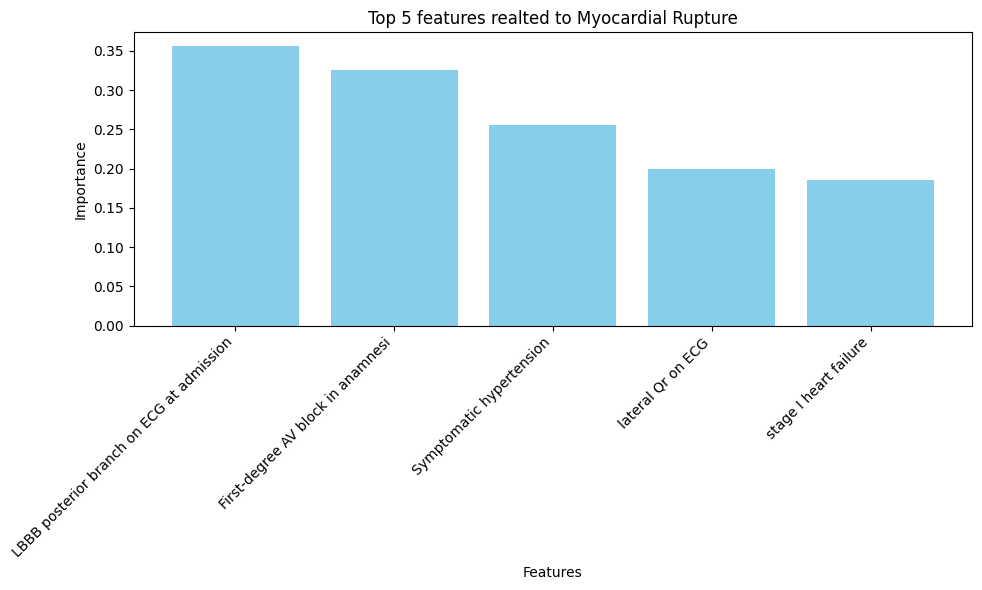

In [73]:
# Take the top 5 features
top_features6= dict(list(sorted_feature_coefficients6.items())[:5])
print(top_features6)
# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features6.keys(), top_features6.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features realted to Myocardial Rupture')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['LBBB posterior branch on ECG at admission',
                           'First-degree AV block in anamnesi',
                           'Symptomatic hypertension',
                           'lateral Qr on ECG',
                           'stage I heart failure'], rotation=45, ha='right') # Renaming x-axis labels
plt.tight_layout()
plt.show()

In [ ]:
y_pred6= svm_classifier6.predict(X_test6)

# Calculate accuracy
accuracy6 = accuracy_score(y_test6, y_pred6)
print("Accuracy:", accuracy6)

Accuracy: 0.9676470588235294


## **Prediction of Dressler Syndrome with SVM**

not fixing this

In [ ]:
# Choose "X" as the 33 features related to Patient - Doctor Interview and "y" as Atrioventricular Block outcome
columns_drop7 = [
    'ID', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT',
    'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im',
    'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04',
    'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03',
    'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10',
    'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07',
    'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01',
    'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K',
    'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S',
    'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n',
    'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n',
    'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK',
    'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']
X_svm7= data_imputed.drop(columns_drop7, axis=1)
y_svm7 = data_imputed['DRESSLER']
print(X_svm7.shape)
print(y_svm7.shape)

X_train7, X_test7, y_train7, y_test7 = train_test_split(X_svm7, y_svm7, test_size=0.2, random_state=42)

# SVM model
svm_classifier7 = SVC(kernel='linear', probability=True)
svm_classifier7.fit(X_train7, y_train7)

# Get the coefficients associated with all features
coefficients7= svm_classifier7.coef_[0]

# Create a dictionary to store features and their coefficients
feature_coefficients7 = {X_svm7.columns[i]: coefficients7[i] for i in range(len(coefficients7))}

# Sort coefficients
sorted_feature_coefficients7 = dict(sorted(feature_coefficients7.items(), key=lambda x: x[1], reverse=True))

# Print all feature coefficients sorted by importance
for feature, importance in sorted_feature_coefficients7.items():
    print(f"Feature: {feature}, Importance: {importance}")


(1700, 33)
(1700,)
Feature: endocr_03, Importance: 0.0005479874859146694
Feature: nr_11, Importance: 0.00045720471089549797
Feature: zab_leg_04, Importance: 0.0003797090803674408
Feature: zab_leg_02, Importance: 0.00033713220651154785
Feature: IBS_POST, Importance: 0.00016913689393049935
Feature: STENOK_AN, Importance: 0.00012902221777721934
Feature: SIM_GIPERT, Importance: 2.980182450240676e-05
Feature: IBS_NASL, Importance: 2.057534075561307e-06
Feature: zab_leg_01, Importance: 1.176969632865621e-11
Feature: zab_leg_06, Importance: 0.0
Feature: AGE, Importance: -1.8548821572039742e-05
Feature: endocr_01, Importance: -4.807101141057757e-05
Feature: SEX, Importance: -0.0001406734170146251
Feature: INF_ANAM, Importance: -0.00015462478167904692
Feature: DLIT_AG, Importance: -0.0002250466528579409
Feature: endocr_02, Importance: -0.0002433019986902707
Feature: FK_STENOK, Importance: -0.0003653747875675961
Feature: GB, Importance: -0.00037101150405760563
Feature: np_07, Importance: -0.0011

{'endocr_03': 0.0005479874859146694, 'nr_11': 0.00045720471089549797, 'zab_leg_04': 0.0003797090803674408, 'zab_leg_02': 0.00033713220651154785, 'IBS_POST': 0.00016913689393049935}


C:\Users\jasmi\AppData\Local\Temp\ipykernel_10304\4278236473.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Thyrotoxicosis in anamnesis',


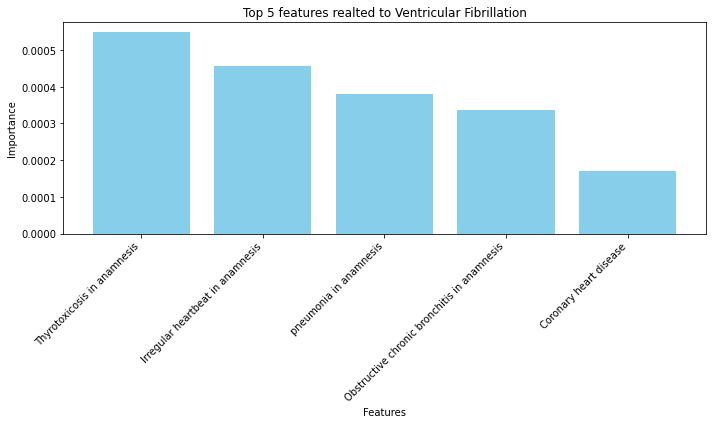

In [ ]:
# Take the top 5 features
top_features7= dict(list(sorted_feature_coefficients7.items())[:5])
print(top_features7)
# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features7.keys(), top_features7.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features realted to Ventricular Fibrillation')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['Thyrotoxicosis in anamnesis',
                           'Irregular heartbeat in anamnesis',
                           'pneumonia in anamnesis',
                           'Obstructive chronic bronchitis in anamnesis',
                           'Coronary heart disease'], rotation=45, ha='right') # Renaming x-axis labels
plt.tight_layout()
plt.show()

In [ ]:
y_pred7= svm_classifier7.predict(X_test7)

# Calculate accuracy
accuracy7 = accuracy_score(y_test7, y_pred7)
print("Accuracy:", accuracy7)

Accuracy: 0.95


## **Prediction of chronic heart failure with SVM**

In [74]:
X_svm8 = data_imputed[features_of_interest]
y_svm8 = data_imputed['ZSN']
print(X_svm8.shape)
print(y_svm8.shape)

X_train8, X_test8, y_train8, y_test8 = train_test_split(X_svm8, y_svm8, test_size=0.2, random_state=42)

# SVM model
svm_classifier8 = SVC(kernel='linear', probability=True)
svm_classifier8.fit(X_train8, y_train8)

# Get the coefficients associated with all features
coefficients8 = abs(svm_classifier8.coef_[0])

# Create a dictionary to store features and their coefficients
feature_coefficients8 = {X_svm8.columns[i]: coefficients8[i] for i in range(len(coefficients8))}

# Sort coefficients
sorted_feature_coefficients8 = dict(sorted(feature_coefficients8.items(), key=lambda x: x[1], reverse=True))

# Print all feature coefficients sorted by importance
for feature, importance in sorted_feature_coefficients8.items():
    print(f"Feature: {feature}, Importance: {importance}")


(1700, 104)
(1700,)
Feature: stage I heart failure, Importance: 2.0980980221020626
Feature: np_09, Importance: 1.997637368925878
Feature: np_10, Importance: 1.117544089448904
Feature: n_r_ecg_p_06, Importance: 1.0610002328471018
Feature: K_SH_POST, Importance: 1.0529847755023851
Feature: n_p_ecg_p_04, Importance: 1.0143197783022688
Feature: np_08, Importance: 1.0070878932223664
Feature: nr_07, Importance: 0.998220981099859
Feature: SVT_POST, Importance: 0.9952606635071088
Feature: nr_01, Importance: 0.9928839243994361
Feature: ritm_ecg_p_04, Importance: 0.9637549542876123
Feature: n_p_ecg_p_06, Importance: 0.9264442643598166
Feature: nr_08, Importance: 0.17675568969603622
Feature: zab_leg_04, Importance: 0.1632253861091395
Feature: n_r_ecg_p_10, Importance: 0.10850343523010392
Feature: nr_02, Importance: 0.09229918424279582
Feature: n_r_ecg_p_05, Importance: 0.08424187892654372
Feature: n_p_ecg_p_10, Importance: 0.08019584263261634
Feature: n_p_ecg_p_09, Importance: 0.07944531531286014

{'stage I heart failure': 2.0980980221020626, 'np_09': 1.997637368925878, 'np_10': 1.117544089448904, 'n_r_ecg_p_06': 1.0610002328471018, 'K_SH_POST': 1.0529847755023851}


C:\Users\yoelh\AppData\Local\Temp\ipykernel_324\2760619898.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Stage I heart failure',


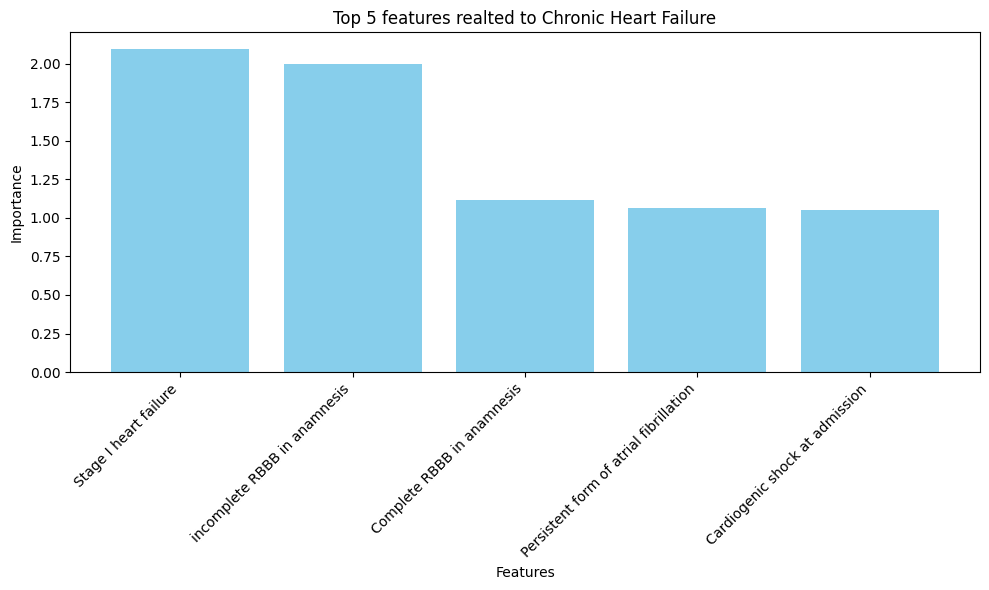

In [76]:
# Take the top 5 features
top_features8= dict(list(sorted_feature_coefficients8.items())[:5])
print(top_features8)
# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features8.keys(), top_features8.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features realted to Chronic Heart Failure')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['Stage I heart failure',
                           'incomplete RBBB in anamnesis',
                           'Complete RBBB in anamnesis',
                           'Persistent form of atrial fibrillation',
                           'Cardiogenic shock at admission'], rotation=45, ha='right') # Renaming x-axis labels
plt.tight_layout()
plt.show()

In [ ]:
y_pred8= svm_classifier8.predict(X_test8)

# Calculate accuracy
accuracy8 = accuracy_score(y_test8, y_pred8)
print("Accuracy:", accuracy8)

Accuracy: 0.7647058823529411


## **Prediction of relapse of myocardial infarction with SVM**

In [ ]:
# Choose "X" as the 33 features related to Patient - Doctor Interview and "y" as Dressler Syndrome outcome
columns_drop9 = [
    'ID', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT',
    'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im',
    'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04',
    'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03',
    'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10',
    'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07',
    'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01',
    'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K',
    'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S',
    'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n',
    'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n',
    'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK',
    'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']
X_svm9 = data_imputed.drop(columns_drop9, axis=1)
y_svm9 = data_imputed['REC_IM']
print(X_svm9.shape)
print(y_svm9.shape)

X_train9, X_test9, y_train9, y_test9 = train_test_split(X_svm9, y_svm9, test_size=0.2, random_state=42)

# SVM model
svm_classifier9 = SVC(kernel='linear', probability=True)
svm_classifier9.fit(X_train9, y_train9)

# Get the coefficients associated with all features
coefficients9 = svm_classifier9.coef_[0]

# Create a dictionary to store features and their coefficients
feature_coefficients9 = {X_svm9.columns[i]: coefficients9[i] for i in range(len(coefficients9))}

# Sort coefficients
sorted_feature_coefficients9 = dict(sorted(feature_coefficients9.items(), key=lambda x: x[1], reverse=True))

# Print all feature coefficients sorted by importance
for feature, importance in sorted_feature_coefficients9.items():
    print(f"Feature: {feature}, Importance: {importance}")


(1700, 33)
(1700,)
Feature: np_01, Importance: 1.9903909217905957
Feature: np_10, Importance: 0.0019142472868208195
Feature: nr_03, Importance: 0.001715408949317876
Feature: nr_02, Importance: 0.0012653883244124753
Feature: zab_leg_03, Importance: 0.0011796799275991532
Feature: endocr_01, Importance: 0.000903388199803068
Feature: zab_leg_02, Importance: 0.0007479859135415268
Feature: SIM_GIPERT, Importance: 0.0005963832654005685
Feature: FK_STENOK, Importance: 0.0004302348540790035
Feature: SEX, Importance: 0.000264947437955243
Feature: endocr_03, Importance: 0.00024411352386891072
Feature: ZSN_A, Importance: 0.00016073952884454457
Feature: GB, Importance: 1.2786607555881346e-05
Feature: AGE, Importance: -1.6593547115917318e-05
Feature: zab_leg_06, Importance: -2.4836615931889128e-05
Feature: INF_ANAM, Importance: -2.9677031747610272e-05
Feature: DLIT_AG, Importance: -9.860044646003985e-05
Feature: STENOK_AN, Importance: -0.00011427960480148158
Feature: endocr_02, Importance: -0.000129

{'np_01': 1.9903909217905957, 'np_10': 0.0019142472868208195, 'nr_03': 0.001715408949317876, 'nr_02': 0.0012653883244124753, 'zab_leg_03': 0.0011796799275991532}


C:\Users\jasmi\AppData\Local\Temp\ipykernel_10304\1649181901.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['First-degree AV block in anamnesis ',


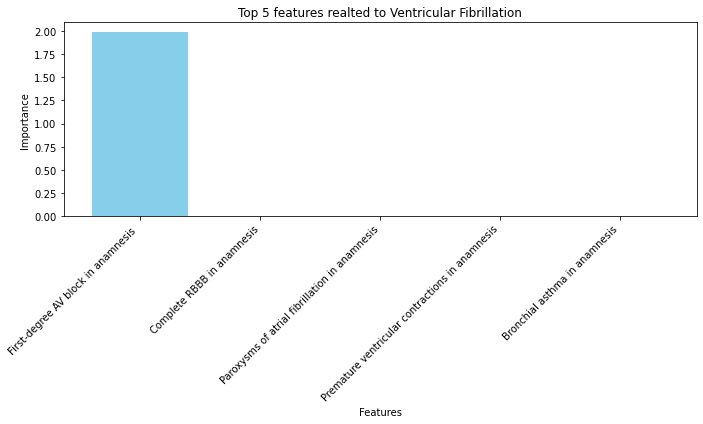

In [ ]:
# Take the top 5 features
top_features9= dict(list(sorted_feature_coefficients9.items())[:5])
print(top_features9)
# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features9.keys(), top_features9.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features realted to Ventricular Fibrillation')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['First-degree AV block in anamnesis ',
                           'Complete RBBB in anamnesis',
                           'Paroxysms of atrial fibrillation in anamnesis',
                           'Premature ventricular contractions in anamnesis',
                           'Bronchial asthma in anamnesis'], rotation=45, ha='right') # Renaming x-axis labels
plt.tight_layout()
plt.show()

In [ ]:
y_pred9= svm_classifier9.predict(X_test9)

# Calculate accuracy
accuracy9 = accuracy_score(y_test9, y_pred9)
print("Accuracy:", accuracy9)

Accuracy: 0.9176470588235294


## **Prediction of Post-infarction angina with SVM**

In [ ]:
# Choose "X" as the 33 features related to Patient - Doctor Interview and "y" as Dressler Syndrome outcome
columns_drop10 = [
    'ID', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT',
    'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im',
    'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04',
    'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03',
    'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10',
    'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07',
    'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01',
    'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08', 'GIPO_K',
    'K_BLOOD', 'GIPER_NA', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S',
    'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_KB', 'NOT_NA_KB', 'LID_KB', 'NITR_S', 'NA_R_1_n', 'NA_R_2_n',
    'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n', 'LID_S_n', 'B_BLOK_S_n', 'ANT_CA_S_n', 'GEPAR_S_n',
    'ASP_S_n', 'TIKL_S_n', 'TRENT_S_n', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK',
    'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']
X_svm10 = data_imputed.drop(columns_drop10, axis=1)
y_svm10 = data_imputed['P_IM_STEN']
print(X_svm10.shape)
print(y_svm10.shape)

X_train10, X_test10, y_train10, y_test10 = train_test_split(X_svm10, y_svm10, test_size=0.2, random_state=42)

# SVM model
svm_classifier10 = SVC(kernel='linear', probability=True)
svm_classifier10.fit(X_train10, y_train10)

# Get the coefficients associated with all features
coefficients10 = svm_classifier10.coef_[0]

# Create a dictionary to store features and their coefficients
feature_coefficients10 = {X_svm10.columns[i]: coefficients10[i] for i in range(len(coefficients10))}

# Sort coefficients
sorted_feature_coefficients10 = dict(sorted(feature_coefficients10.items(), key=lambda x: x[1], reverse=True))

# Print all feature coefficients sorted by importance
for feature, importance in sorted_feature_coefficients10.items():
    print(f"Feature: {feature}, Importance: {importance}")


(1700, 33)
(1700,)
Feature: nr_08, Importance: 0.01414142893394399
Feature: np_05, Importance: 0.0027363098374741934
Feature: IBS_NASL, Importance: 0.0025419692304211594
Feature: np_10, Importance: 0.0017706887263949644
Feature: np_08, Importance: 0.0013032272616460006
Feature: DLIT_AG, Importance: 0.0011472593227410677
Feature: zab_leg_01, Importance: 0.0009500024775253024
Feature: IBS_POST, Importance: 0.0007591983049621831
Feature: endocr_03, Importance: 0.000436563585201475
Feature: FK_STENOK, Importance: 0.0003128622143044879
Feature: INF_ANAM, Importance: 0.00015701404218759762
Feature: STENOK_AN, Importance: 0.00012388862981538296
Feature: endocr_01, Importance: 0.00012271895163173951
Feature: AGE, Importance: -5.6715713924404554e-05
Feature: zab_leg_06, Importance: -0.00015021561307504427
Feature: np_07, Importance: -0.0004369534022029787
Feature: SEX, Importance: -0.0007937164974833877
Feature: np_01, Importance: -0.0008739068044059573
Feature: nr_07, Importance: -0.0008950954

{'nr_08': 0.01414142893394399, 'np_05': 0.0027363098374741934, 'IBS_NASL': 0.0025419692304211594, 'np_10': 0.0017706887263949644, 'np_08': 0.0013032272616460006}


C:\Users\jasmi\AppData\Local\Temp\ipykernel_10304\3079624664.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Ventricular paroxysmal tachycardia in anamnesis',


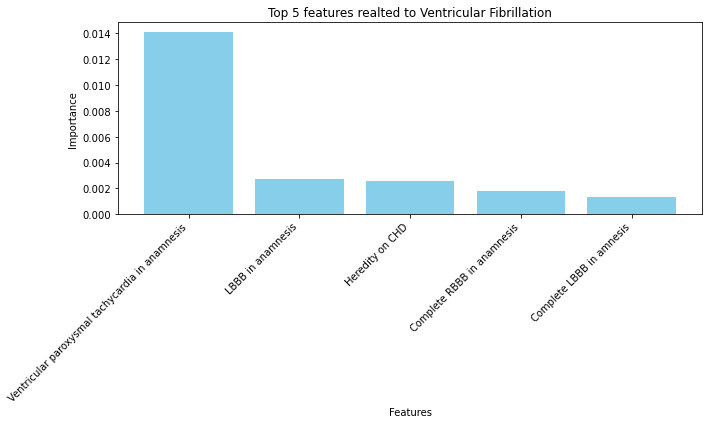

In [ ]:
# Take the top 5 features
top_features10= dict(list(sorted_feature_coefficients10.items())[:5])
print(top_features10)
# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.bar(top_features10.keys(), top_features10.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 features realted to Ventricular Fibrillation')
plt.xticks(rotation=45, ha='right')
plt.gca().set_xticklabels(['Ventricular paroxysmal tachycardia in anamnesis',
                           'LBBB in anamnesis',
                           'Heredity on CHD',
                           'Complete RBBB in anamnesis',
                           'Complete LBBB in amnesis'], rotation=45, ha='right') # Renaming x-axis labels
plt.tight_layout()
plt.show()

In [ ]:
y_pred10= svm_classifier10.predict(X_test10)

# Calculate accuracy
accuracy10= accuracy_score(y_test10, y_pred10)
print("Accuracy:", accuracy10)

Accuracy: 0.9176470588235294
